### Диаграммы рассеяния

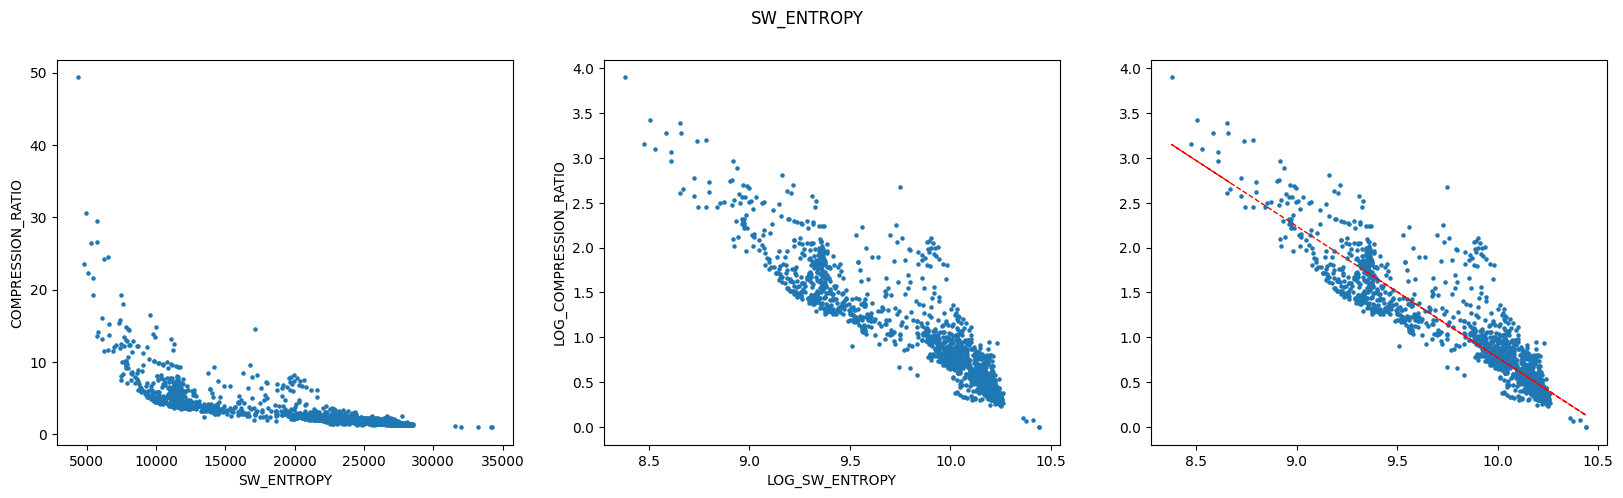

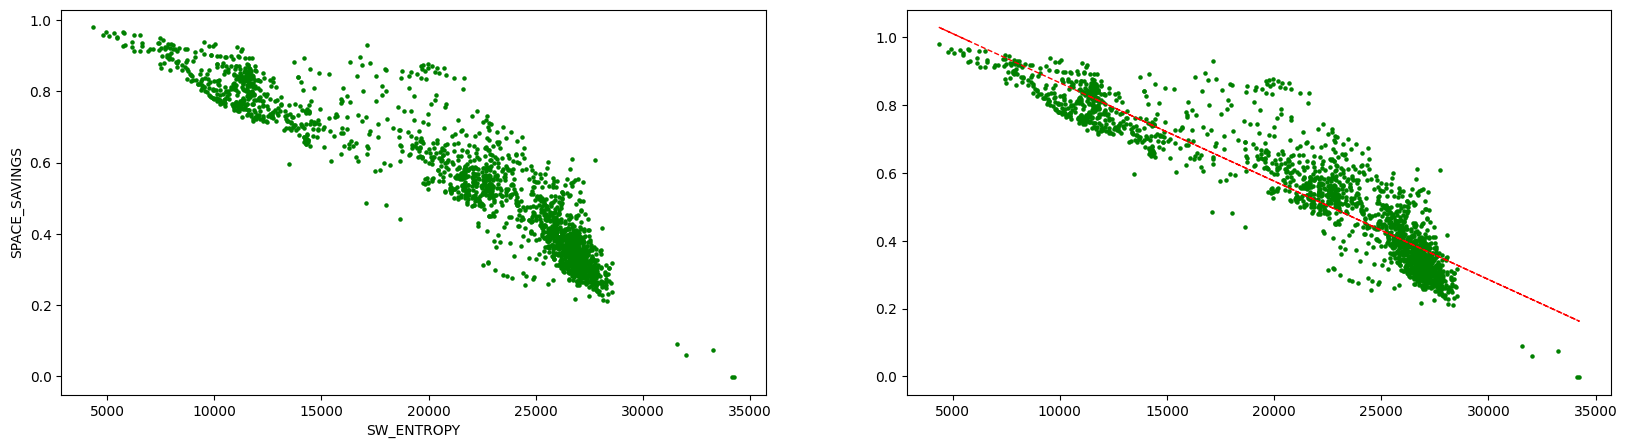

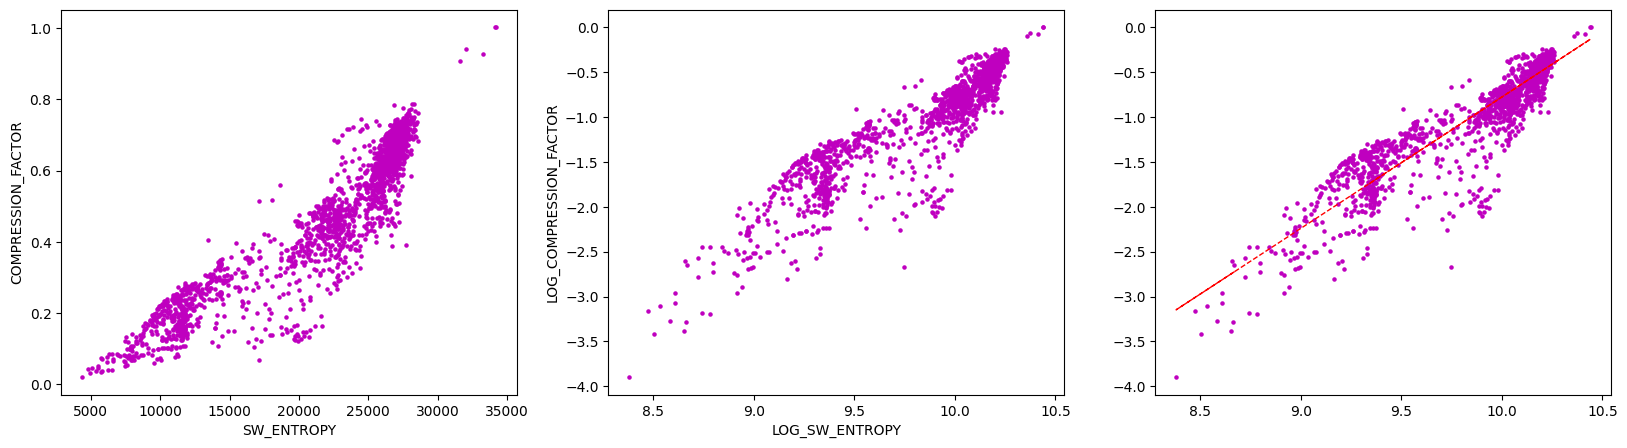

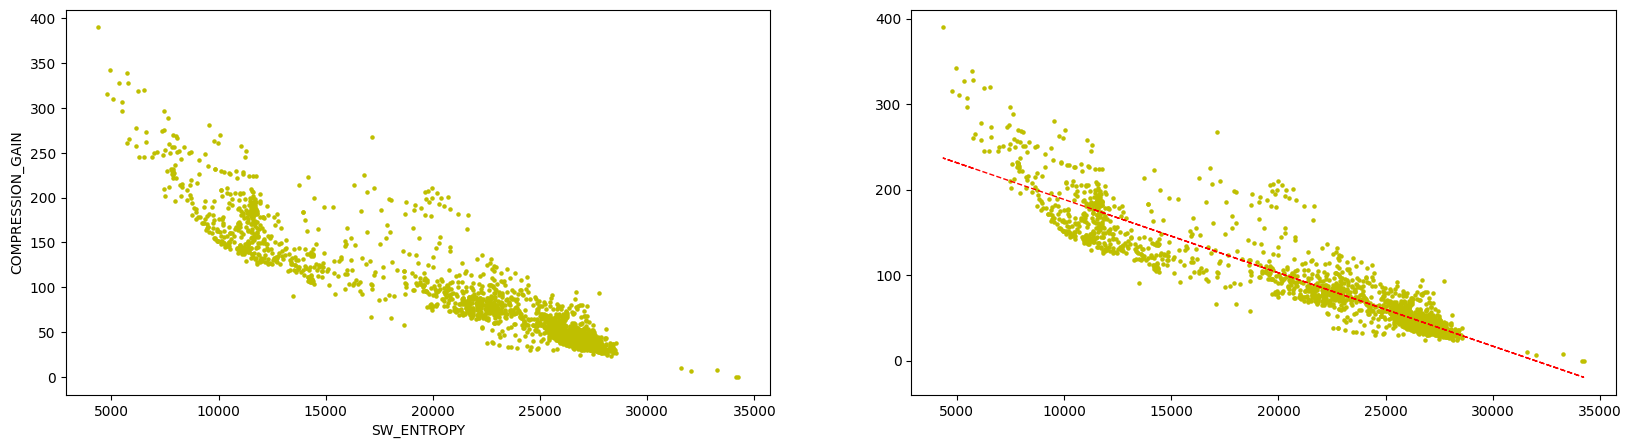

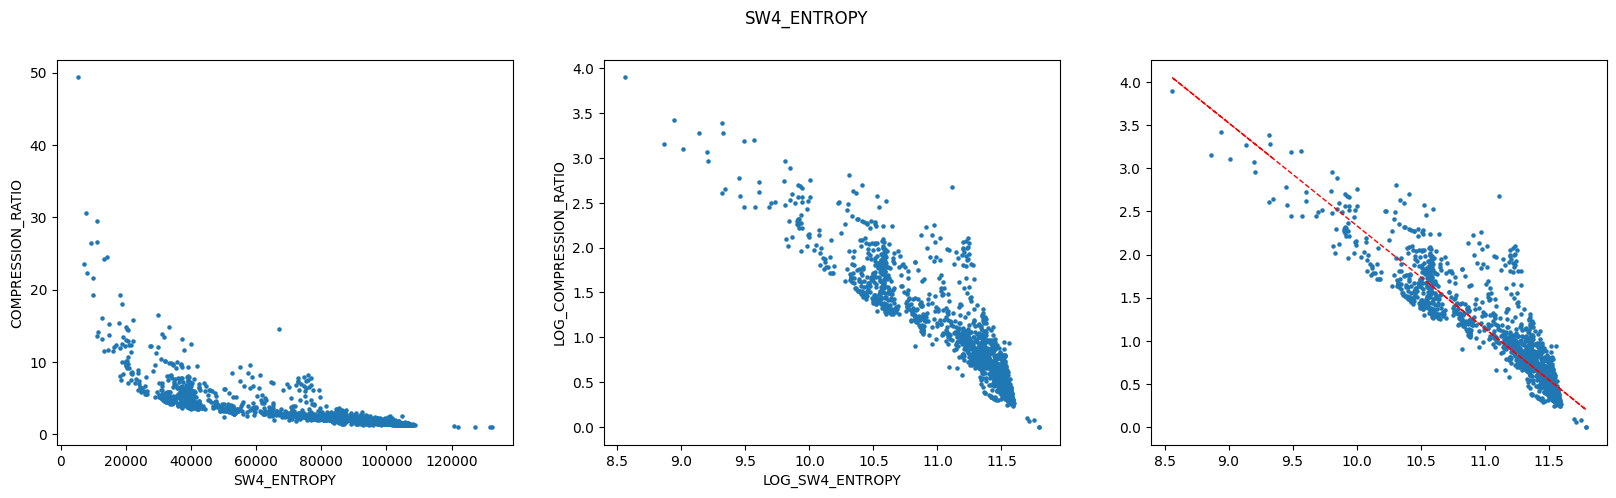

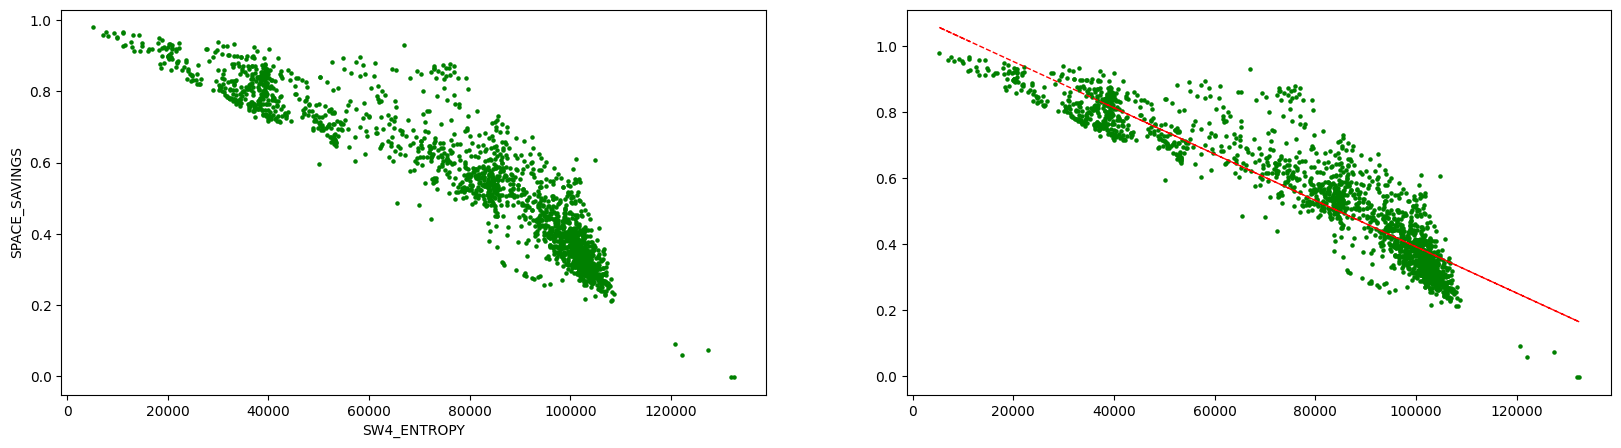

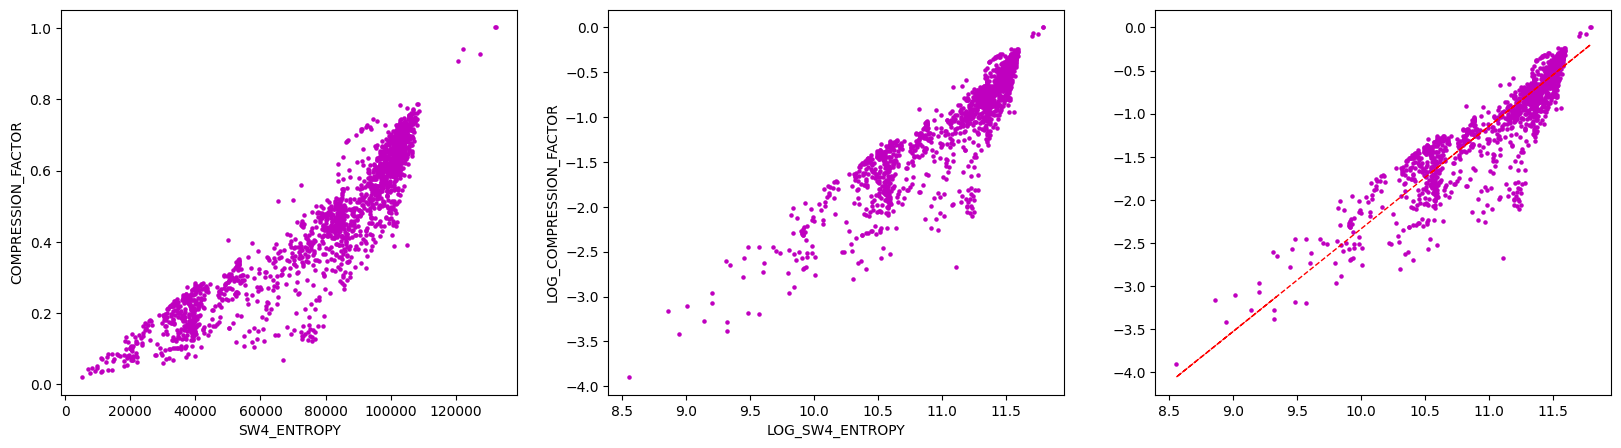

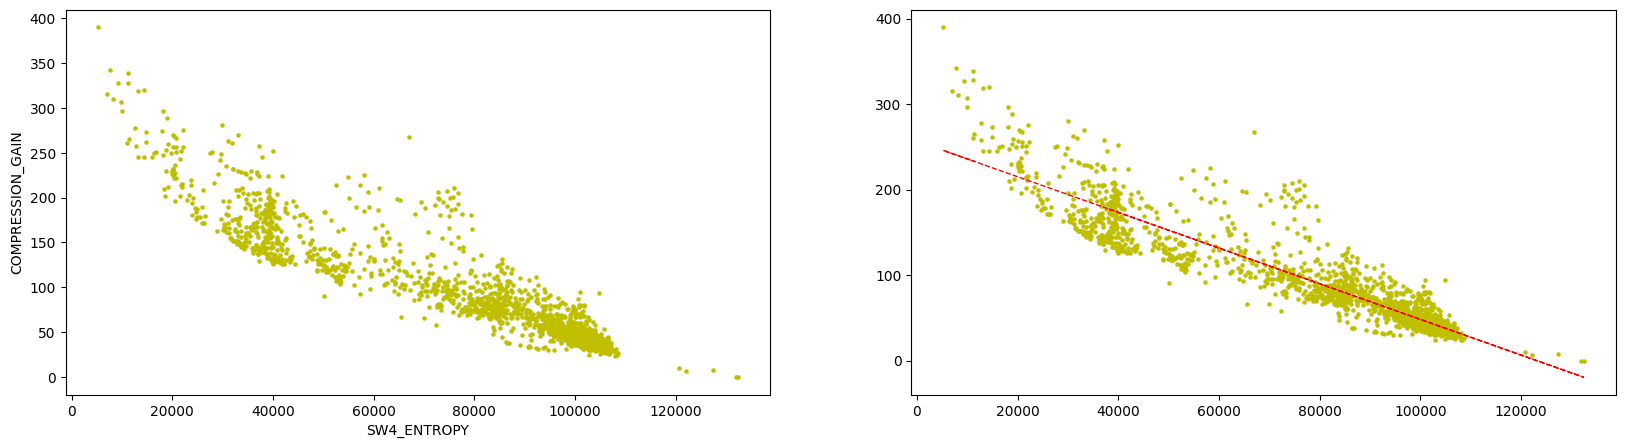

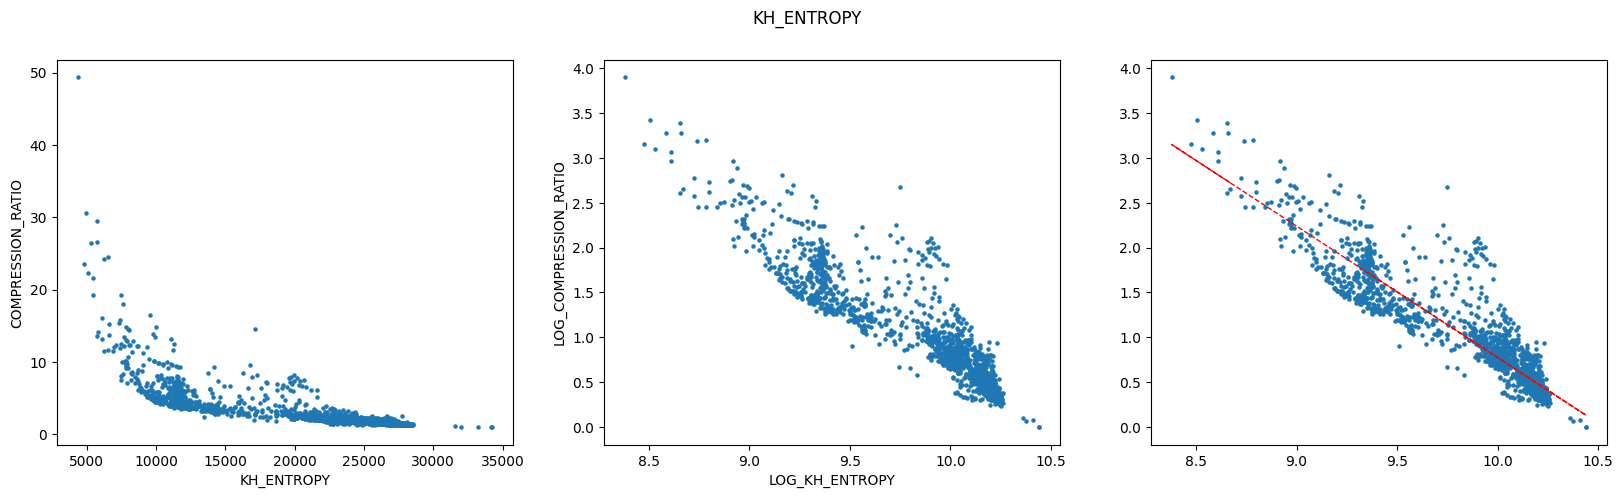

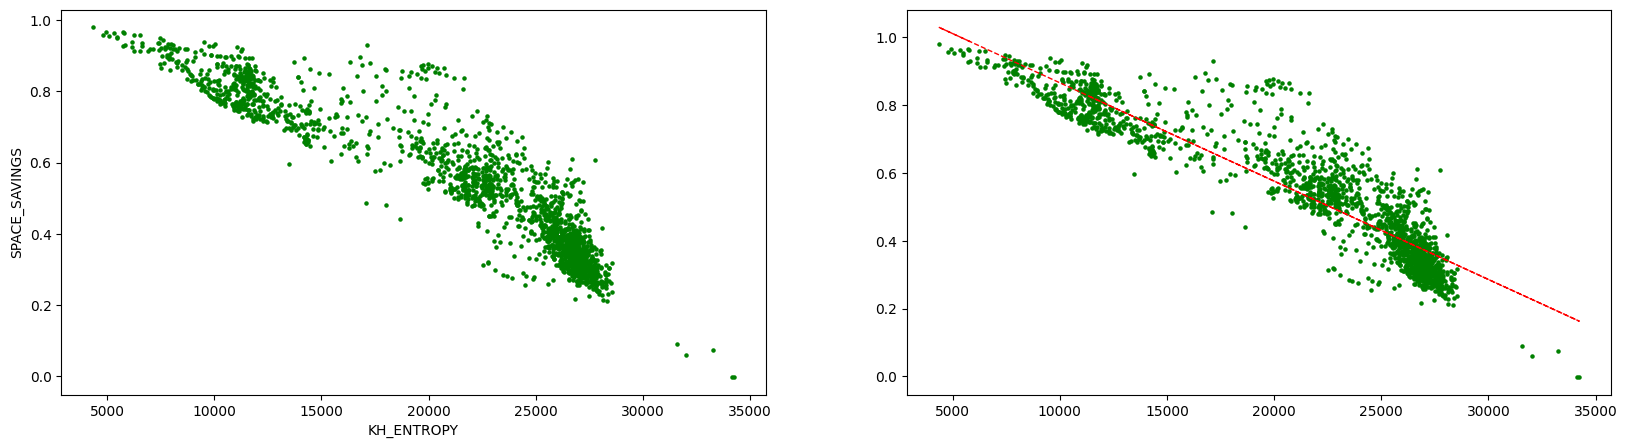

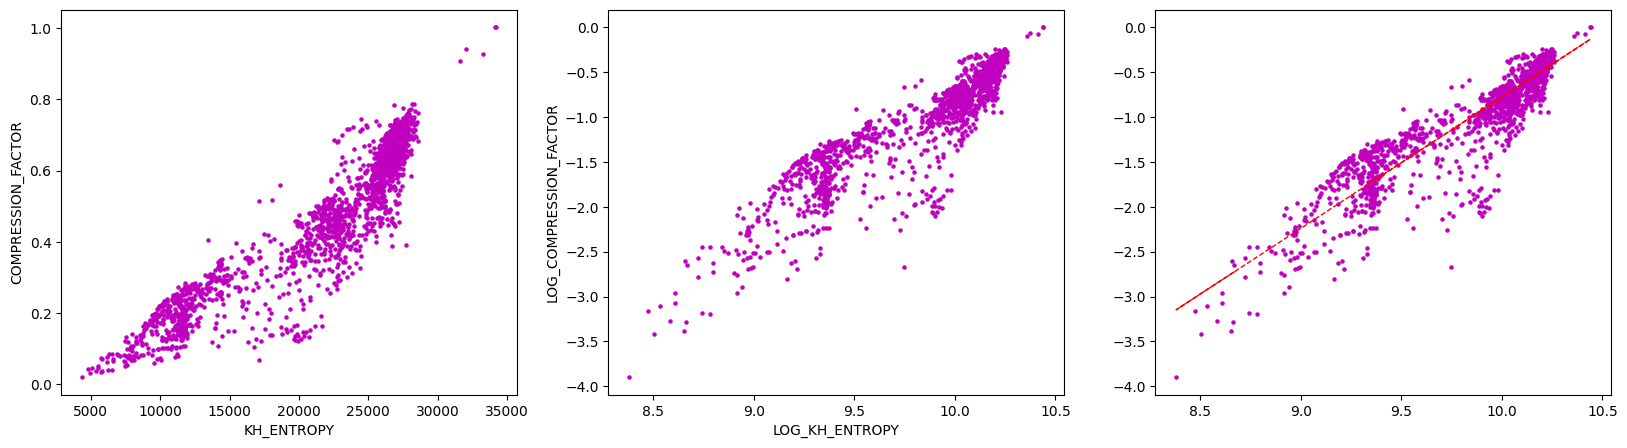

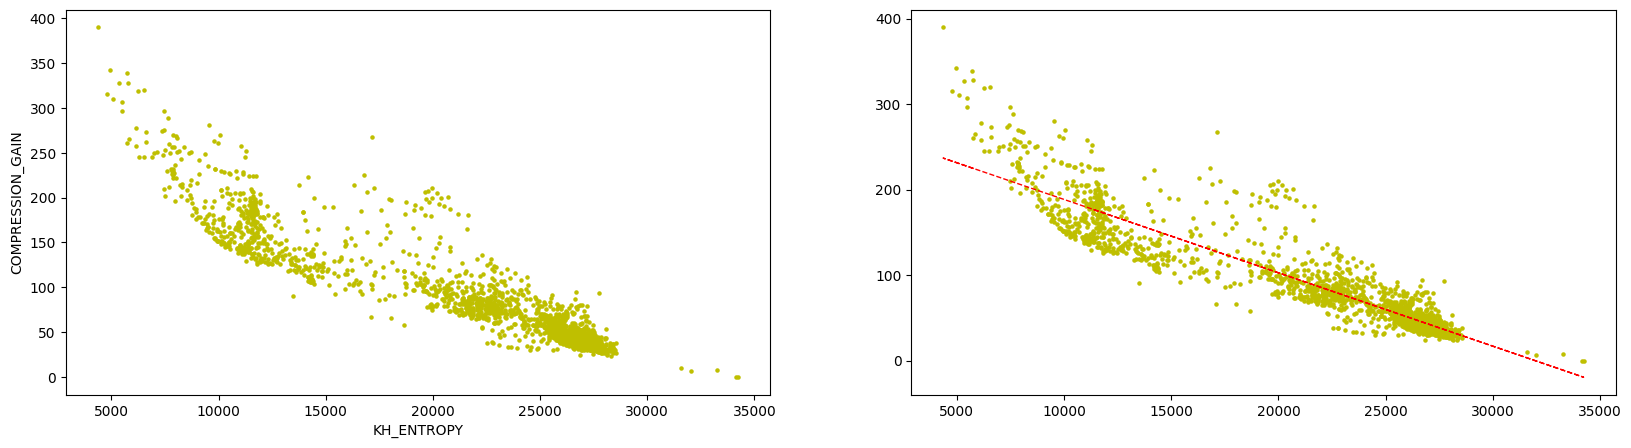

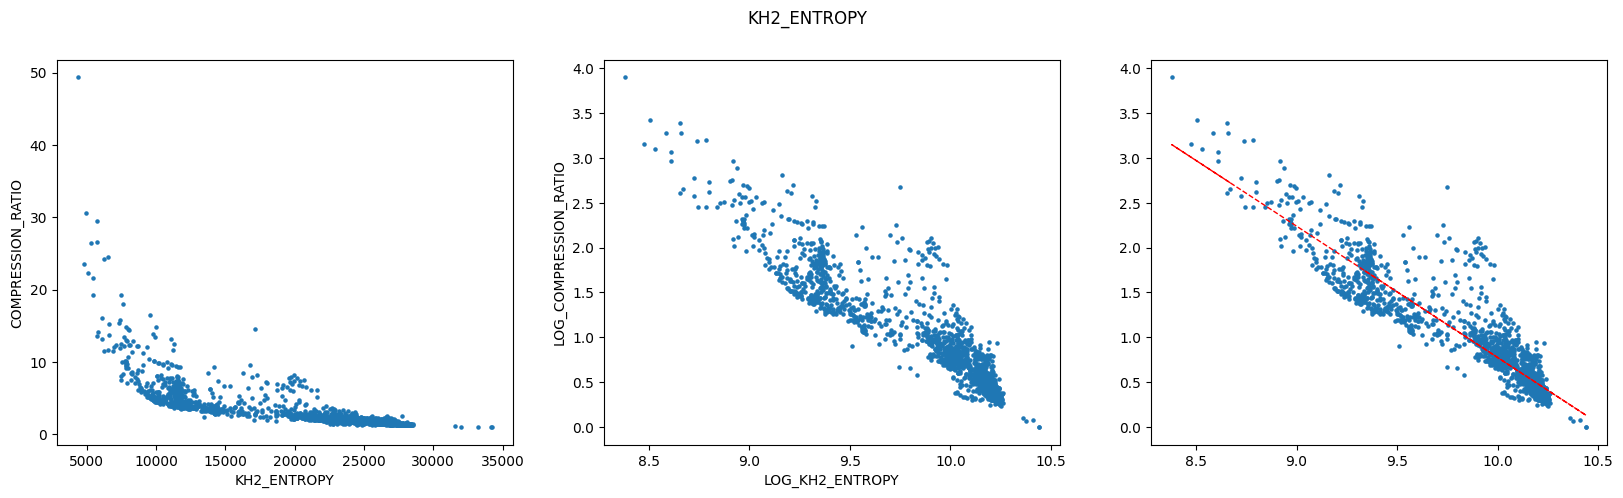

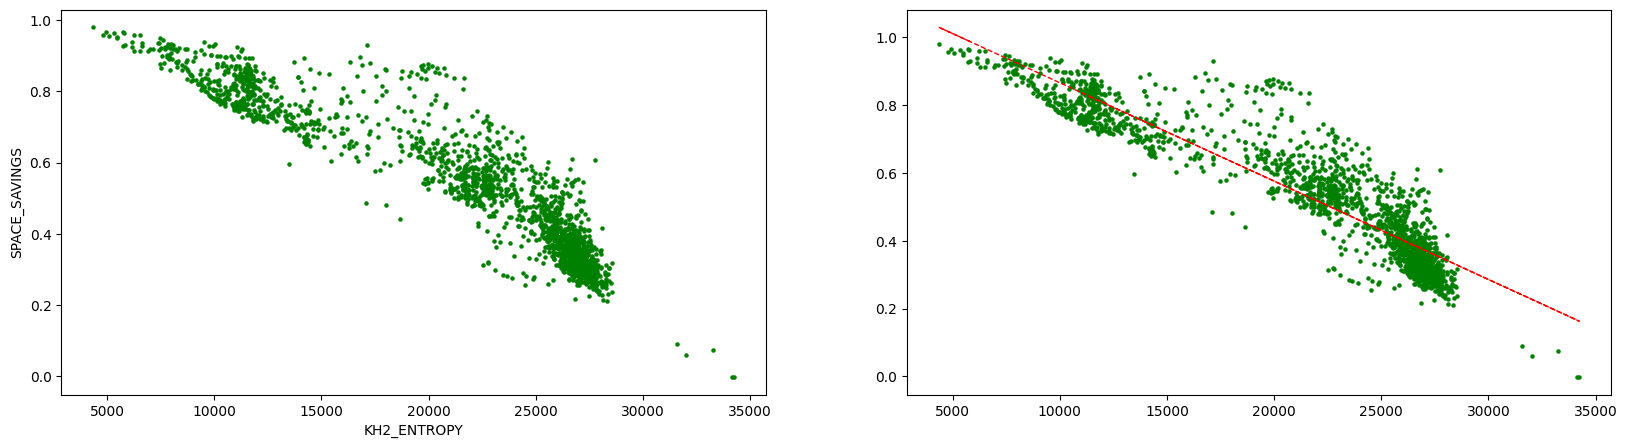

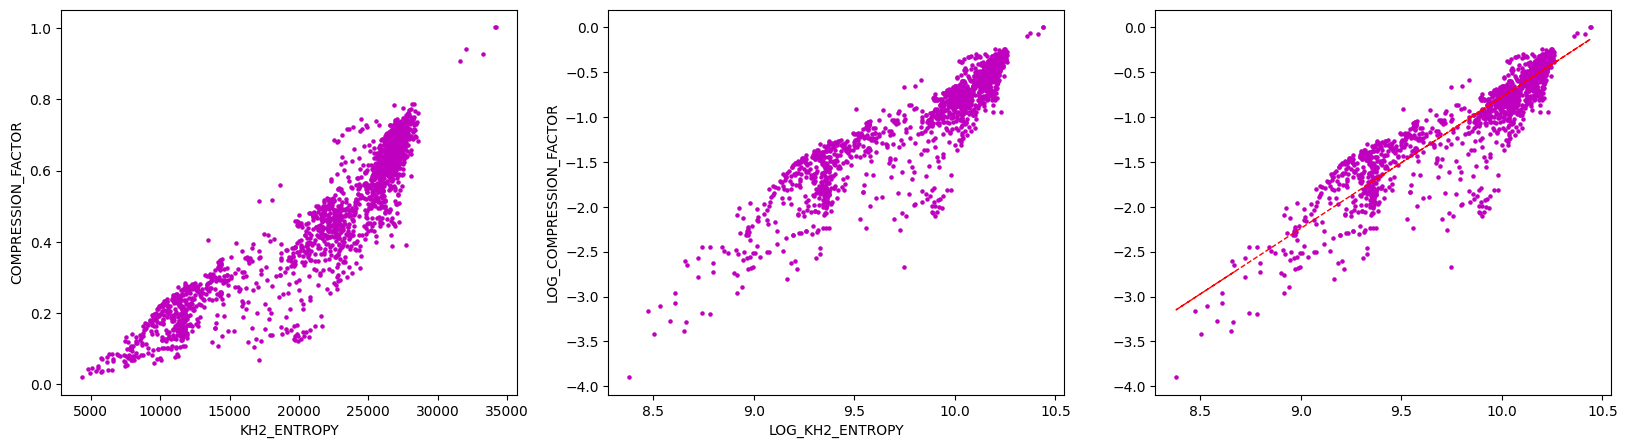

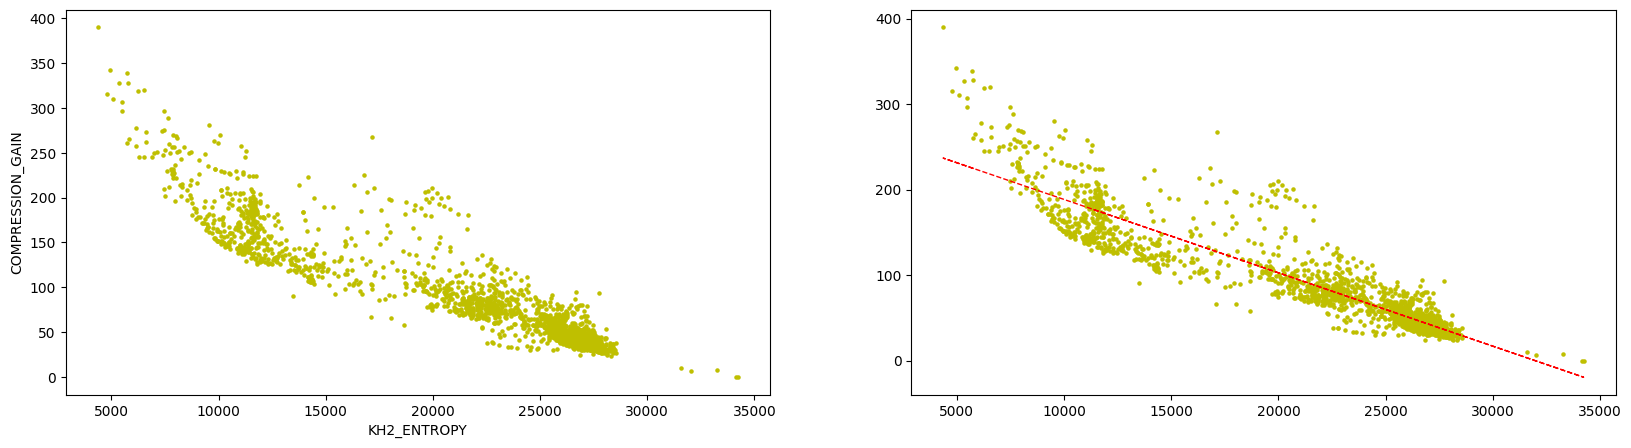

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dataclasses import dataclass


DATA_PATH = 'https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/'
FILE = 'zstd-bin.csv'

@dataclass
class EntropyType:
  sw = 'SW_ENTROPY'
  sw4 = 'SW4_ENTROPY'
  b2 = 'B2_ENTROPY'
  b4 = 'B4_ENTROPY'
  kh = 'KH_ENTROPY'
  kh2 = 'KH2_ENTROPY'


def visualize_statistics(file, entropy_type):
  df = pd.read_csv(DATA_PATH + file)

  log_entropy = 'LOG_' + entropy_type
  # логарифмирование значений по X и Y
  df[log_entropy] = np.log(df[entropy_type])
  df['LOG_COMPRESSION_RATIO'] = np.log(df['COMPRESSION_RATIO'])
  #df['LOG_SPACE_SAVINGS'] = np.log(df['SPACE_SAVINGS'])
  df['LOG_COMPRESSION_FACTOR'] = np.log(df['COMPRESSION_FACTOR'])
  #df['LOG_COMPRESSION_GAIN'] = np.log(df['COMPRESSION_GAIN'])


  # для построения trendline
  z1 = np.polyfit(df[log_entropy], df['LOG_COMPRESSION_RATIO'], 1)
  p1 = np.poly1d(z1)

  z2 = np.polyfit(df[entropy_type], df['SPACE_SAVINGS'], 1)
  p2 = np.poly1d(z2)

  z3 = np.polyfit(df[log_entropy], df['LOG_COMPRESSION_FACTOR'], 1)
  p3 = np.poly1d(z3)

  z4 = np.polyfit(df[entropy_type], df['COMPRESSION_GAIN'], 1)
  p4 = np.poly1d(z4)


  # построение диаграмм рассеяния
  fig1, axs1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
  df.plot(ax=axs1[0], x=entropy_type, y='COMPRESSION_RATIO', kind='scatter', s=5)
  df.plot(ax=axs1[1], x=log_entropy, y='LOG_COMPRESSION_RATIO', kind='scatter', s=5)
  axs1[2].scatter(df[log_entropy], df['LOG_COMPRESSION_RATIO'], s=5)
  axs1[2].plot(df[log_entropy], p1(df[log_entropy]), "r--", linewidth=1)
  fig1.suptitle(entropy_type)

  fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
  df.plot(ax=axs2[0], x=entropy_type, y='SPACE_SAVINGS', kind='scatter', s=5, color='g')
  #df.plot(ax=axs2[1], x=log_entropy, y='LOG_SPACE_SAVINGS', kind='scatter', s=5, color='g')
  axs2[1].scatter(df[entropy_type], df['SPACE_SAVINGS'], s=5, c='g')
  axs2[1].plot(df[entropy_type], p2(df[entropy_type]), "r--", linewidth=1)

  fig3, axs3 = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
  df.plot(ax=axs3[0], x=entropy_type, y='COMPRESSION_FACTOR', kind='scatter', s=5, color='m')
  df.plot(ax=axs3[1], x=log_entropy, y='LOG_COMPRESSION_FACTOR', kind='scatter', s=5, color='m')
  axs3[2].scatter(df[log_entropy], df['LOG_COMPRESSION_FACTOR'], s=5, c='m')
  axs3[2].plot(df[log_entropy], p3(df[log_entropy]), "r--", linewidth=1)

  fig4, axs4 = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
  df.plot(ax=axs4[0], x=entropy_type, y='COMPRESSION_GAIN', kind='scatter', s=5, color='y')
  #df.plot(ax=axs4[1], x=log_entropy, y='LOG_COMPRESSION_GAIN', kind='scatter', s=5, color='y')
  axs4[1].scatter(df[entropy_type], df['COMPRESSION_GAIN'], s=5, c='y')
  axs4[1].plot(df[entropy_type], p4(df[entropy_type]), "r--", linewidth=1)


visualize_statistics(FILE, EntropyType.sw)

visualize_statistics(FILE, EntropyType.sw4)

visualize_statistics(FILE, EntropyType.kh)

visualize_statistics(FILE, EntropyType.kh2)

### Матрицы корреляций

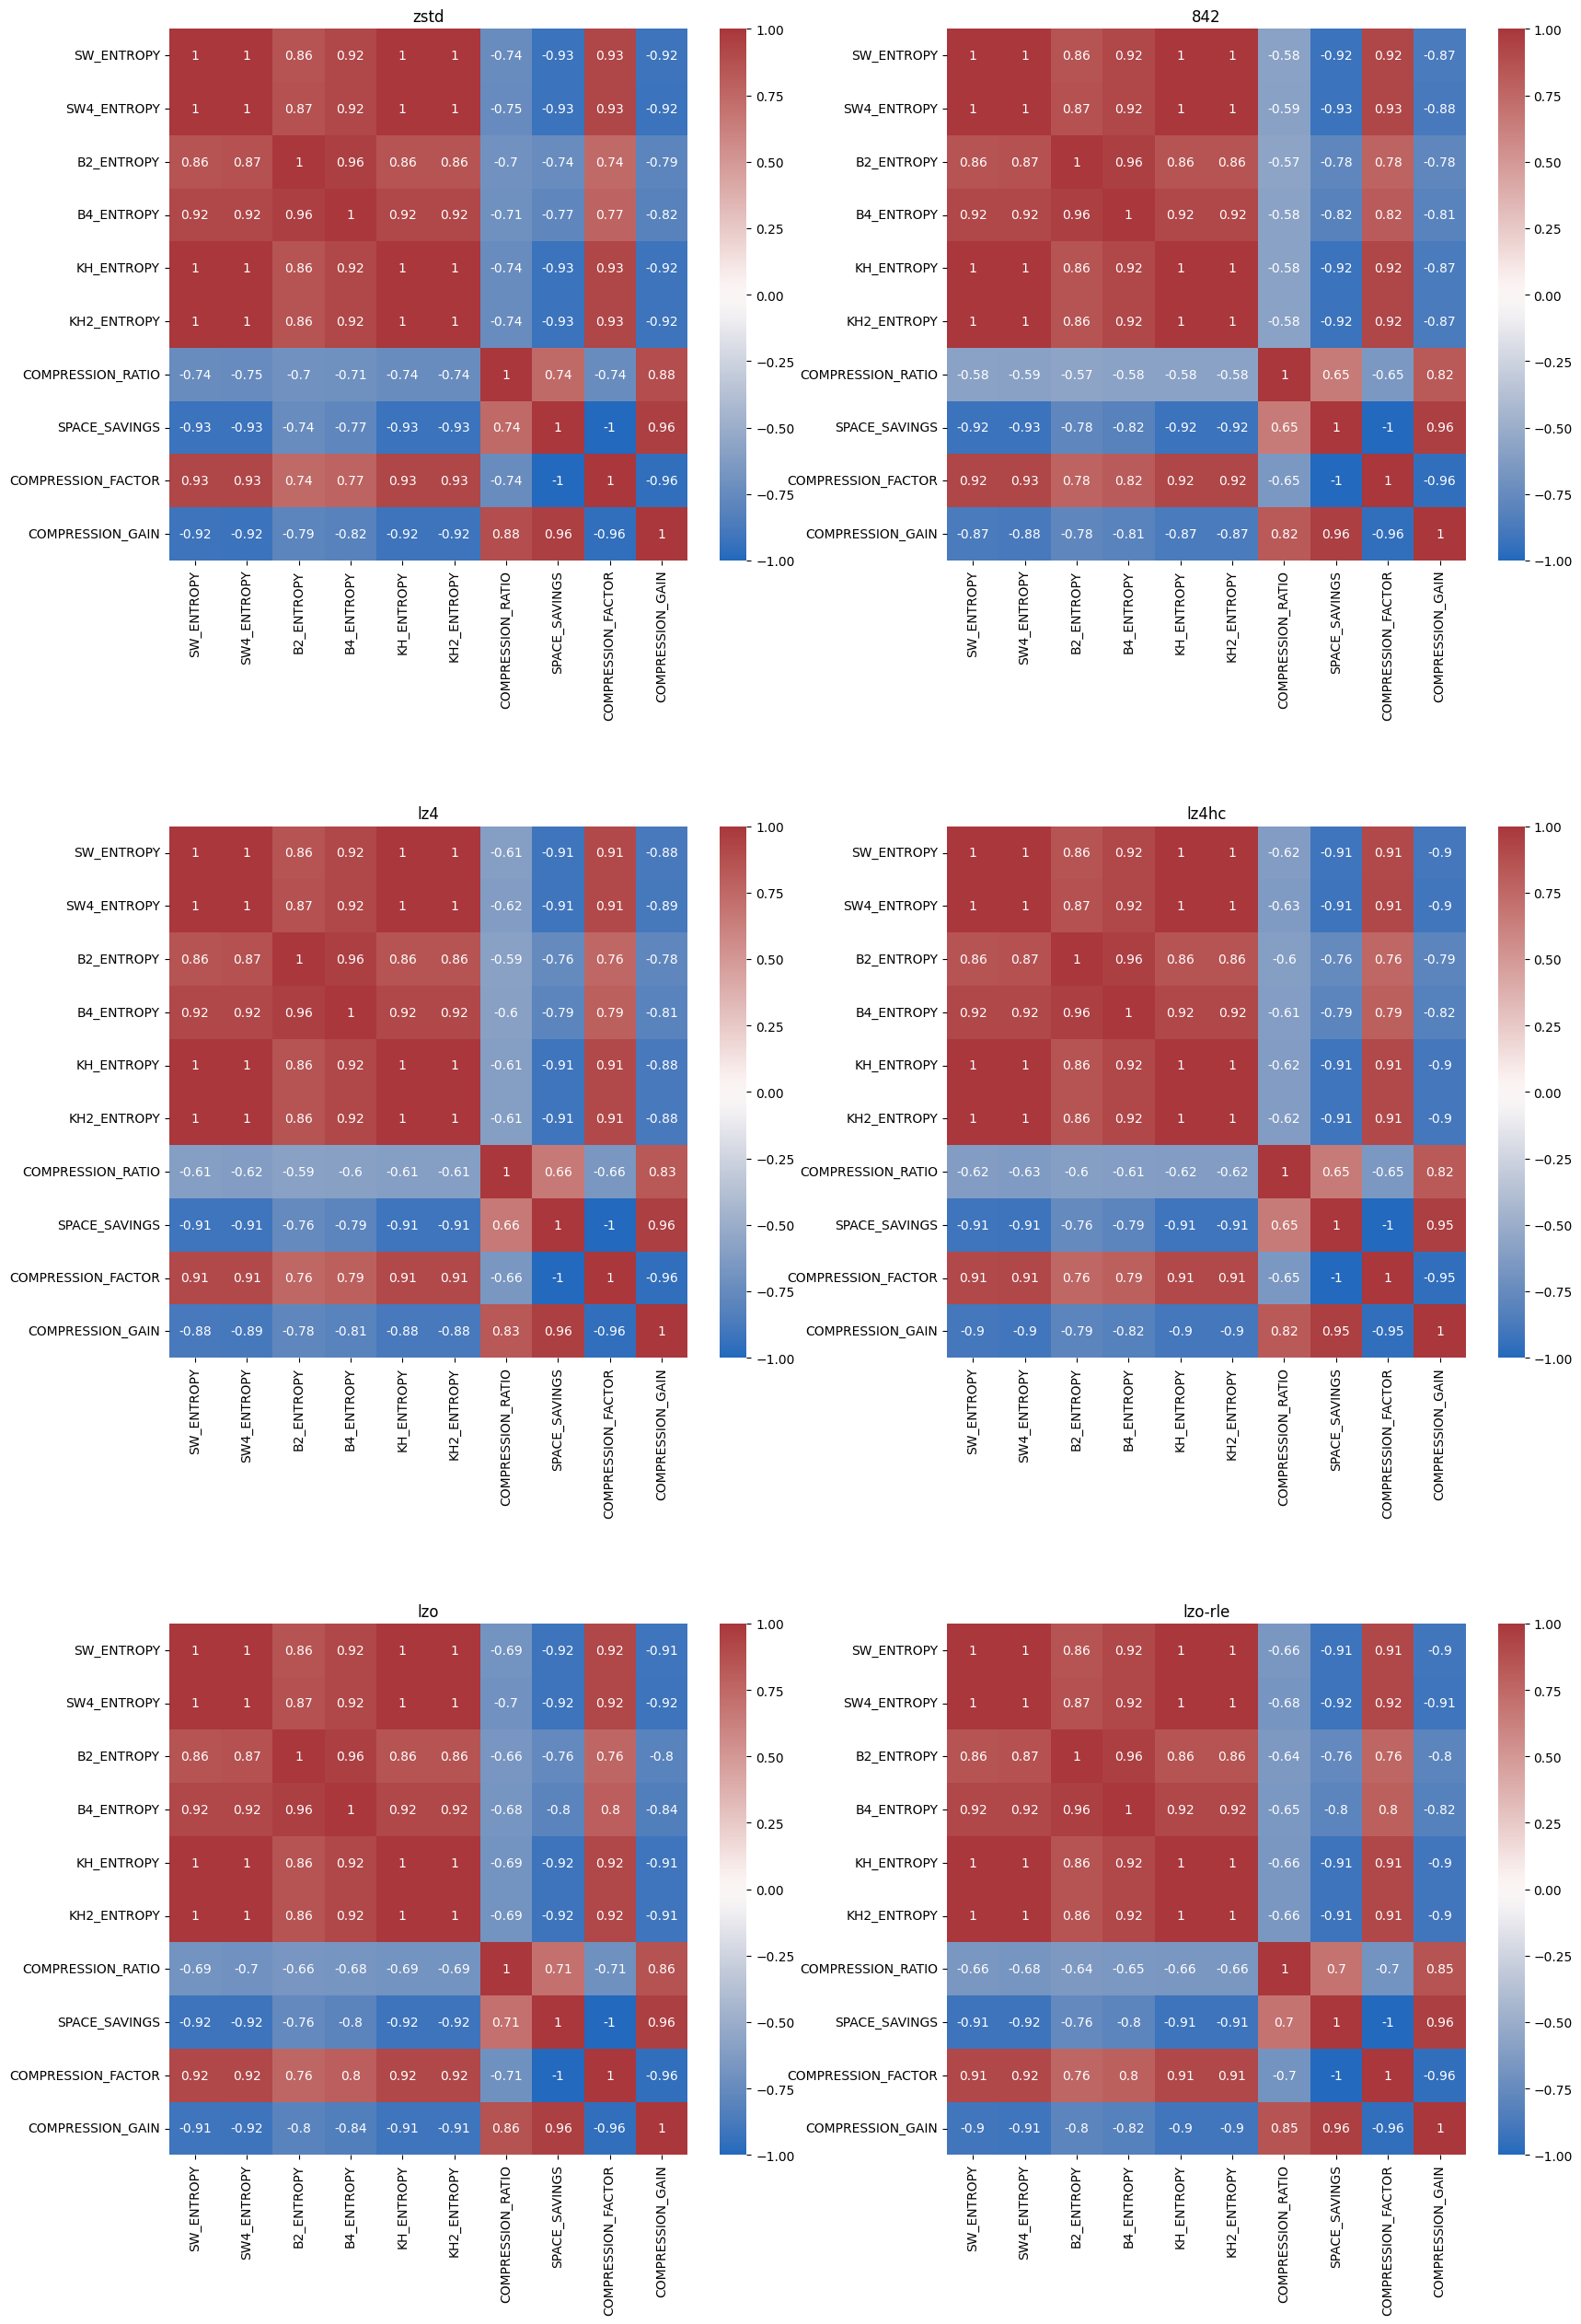

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = 'https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/'

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))

columns = ['SW_ENTROPY', 'SW4_ENTROPY',
           'B2_ENTROPY', 'B4_ENTROPY', 
           'KH_ENTROPY', 'KH2_ENTROPY',
           'COMPRESSION_RATIO', 'SPACE_SAVINGS', 
           'COMPRESSION_FACTOR', 'COMPRESSION_GAIN']

df1 = pd.read_csv(DATA_PATH + 'zstd-bin.csv')
data1 = df1[columns]
matrix1 = data1.corr()
sns.heatmap(matrix1, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=axes[0][0])
axes[0][0].set_title('zstd')

df2 = pd.read_csv(DATA_PATH + '842-bin.csv')
data2 = df2[columns]
matrix2 = data2.corr()
sns.heatmap(matrix2, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=axes[0][1])
axes[0][1].set_title('842')

df3 = pd.read_csv(DATA_PATH + 'lz4-bin.csv')
data3 = df3[columns]
matrix3 = data3.corr()
sns.heatmap(matrix3, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=axes[1][0])
axes[1][0].set_title('lz4')

df4 = pd.read_csv(DATA_PATH + 'lz4hc-bin.csv')
data4 = df4[columns]
matrix4 = data4.corr()
sns.heatmap(matrix4, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=axes[1][1])
axes[1][1].set_title('lz4hc')

df5 = pd.read_csv(DATA_PATH + 'lzo-bin.csv')
data5 = df5[columns]
matrix5 = data5.corr()
sns.heatmap(matrix5, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=axes[2][0])
axes[2][0].set_title('lzo')

df6 = pd.read_csv(DATA_PATH + 'lzo-rle-bin.csv')
data6 = df6[columns]
matrix6 = data6.corr()
sns.heatmap(matrix6, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=axes[2][1])
axes[2][1].set_title('lzo-rle')

plt.subplots_adjust(hspace=0.5)
plt.show()

### Анализ времени

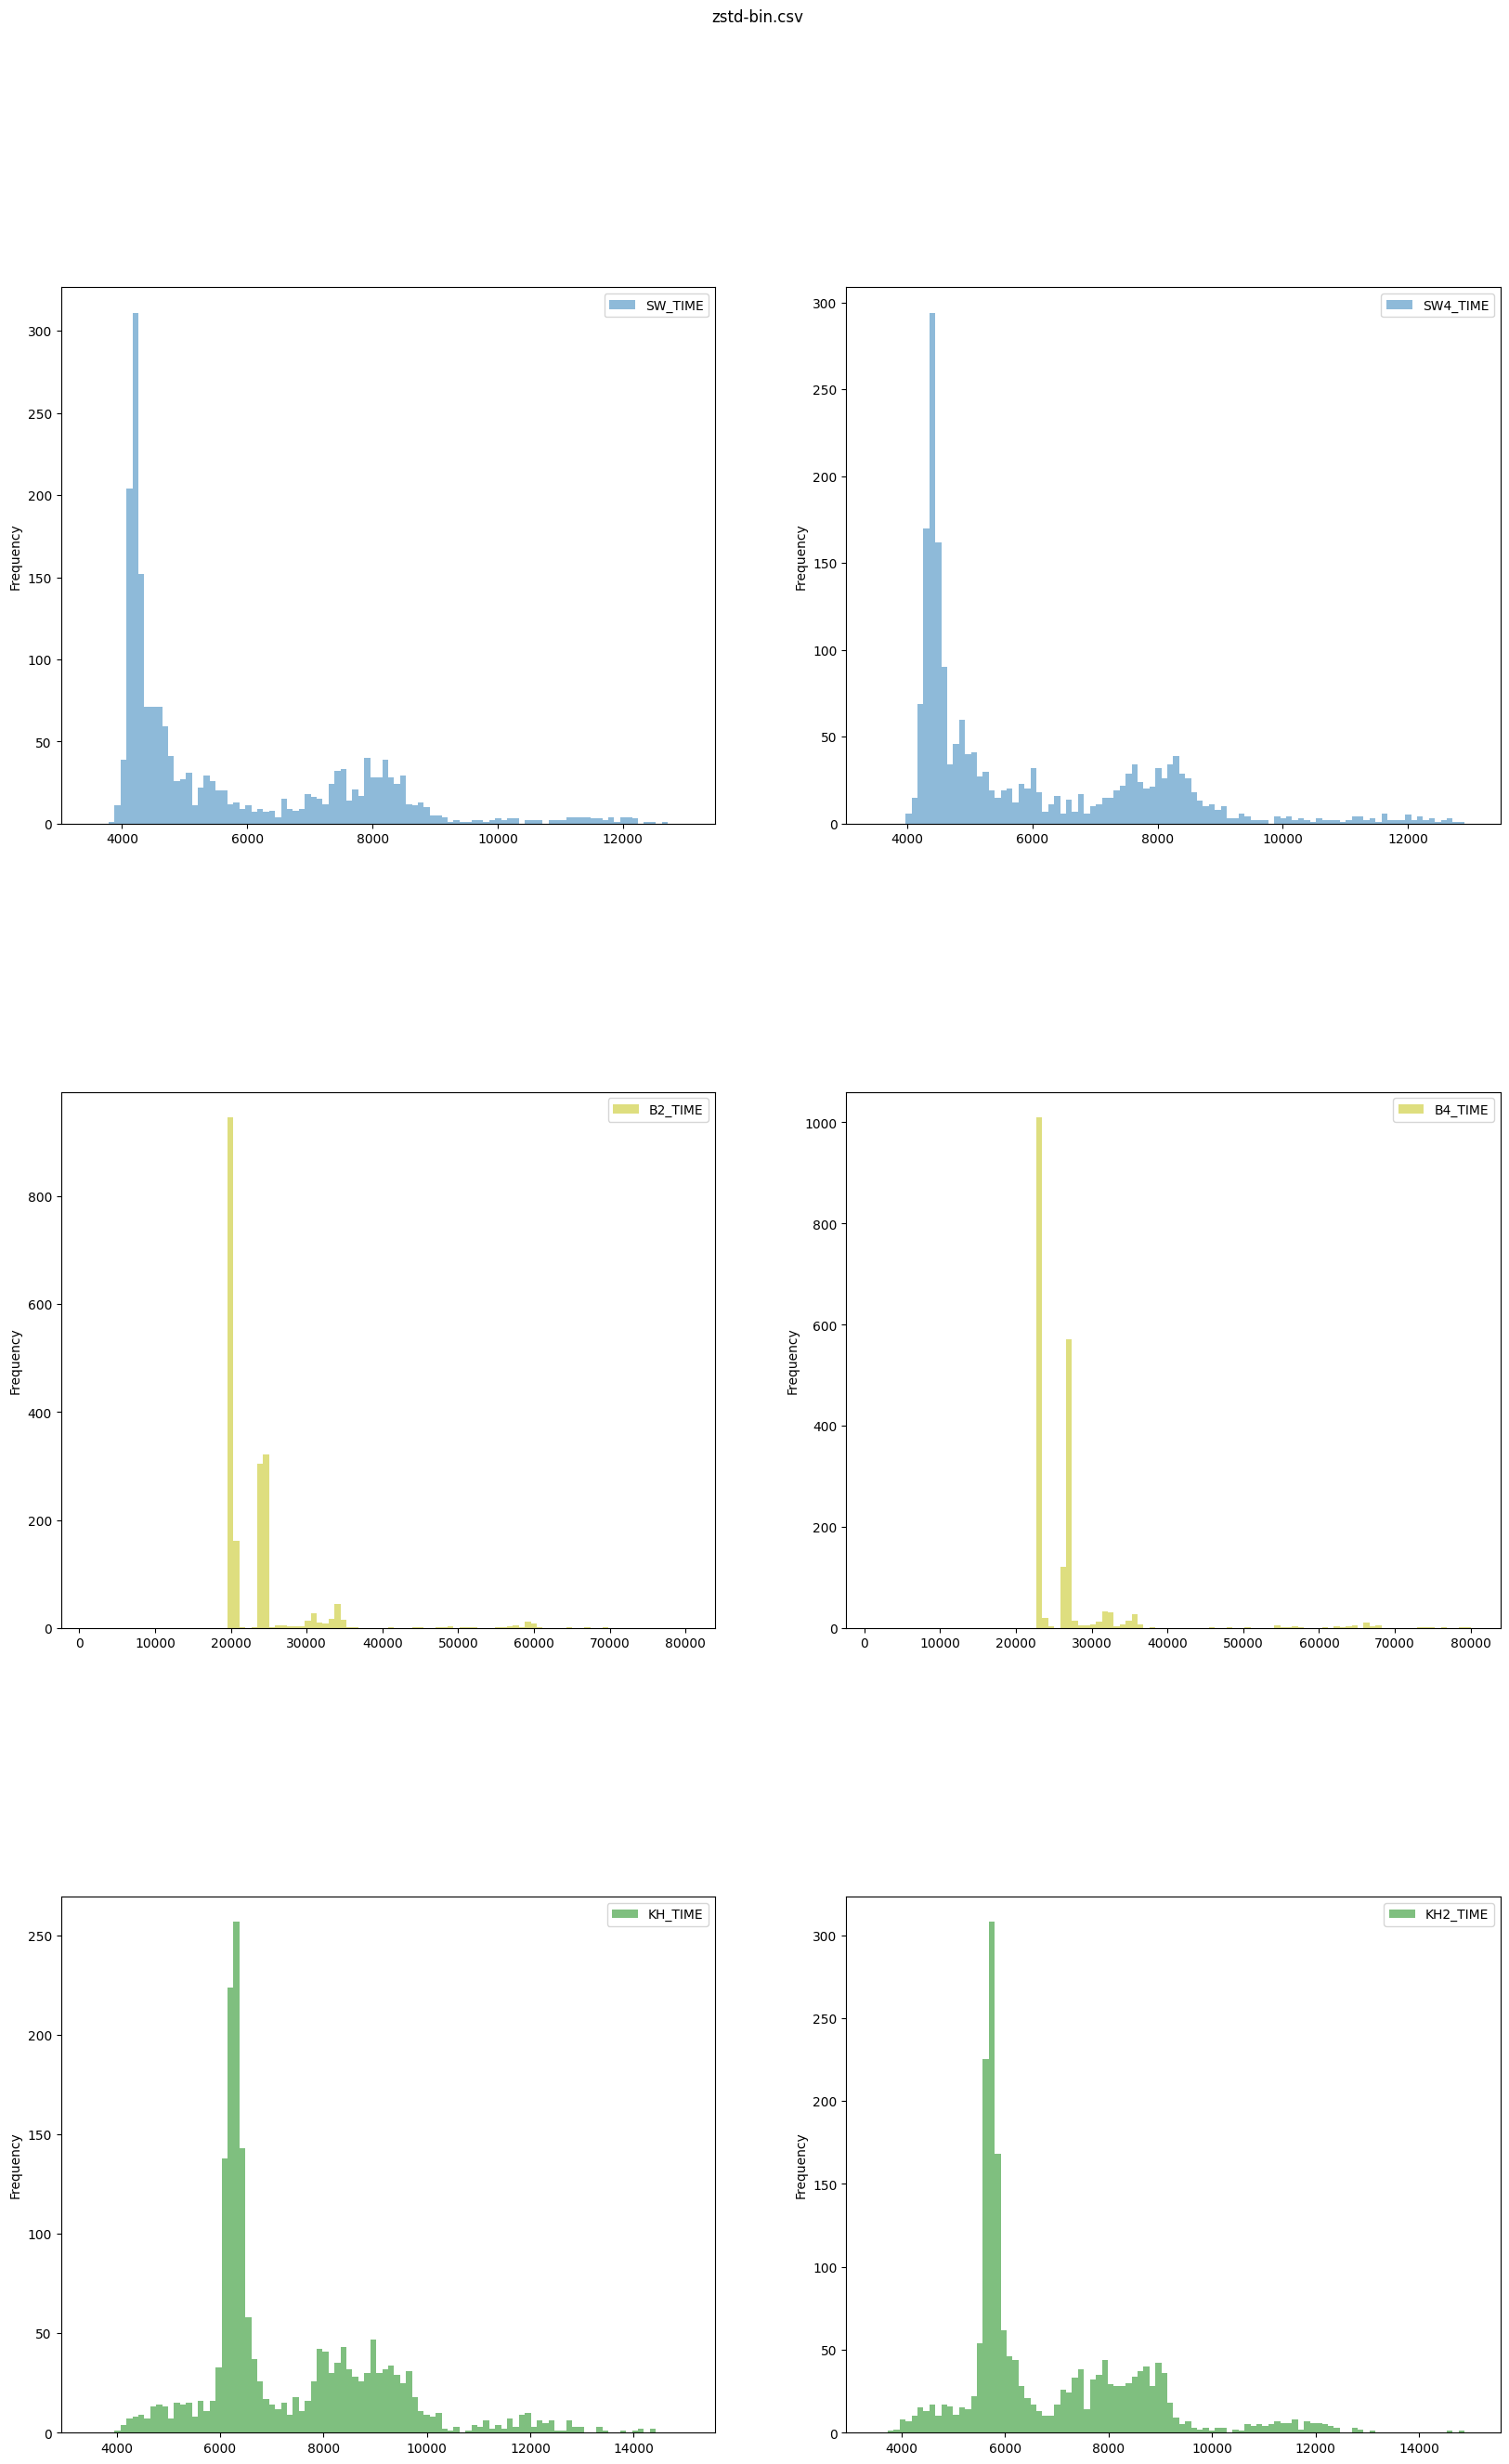

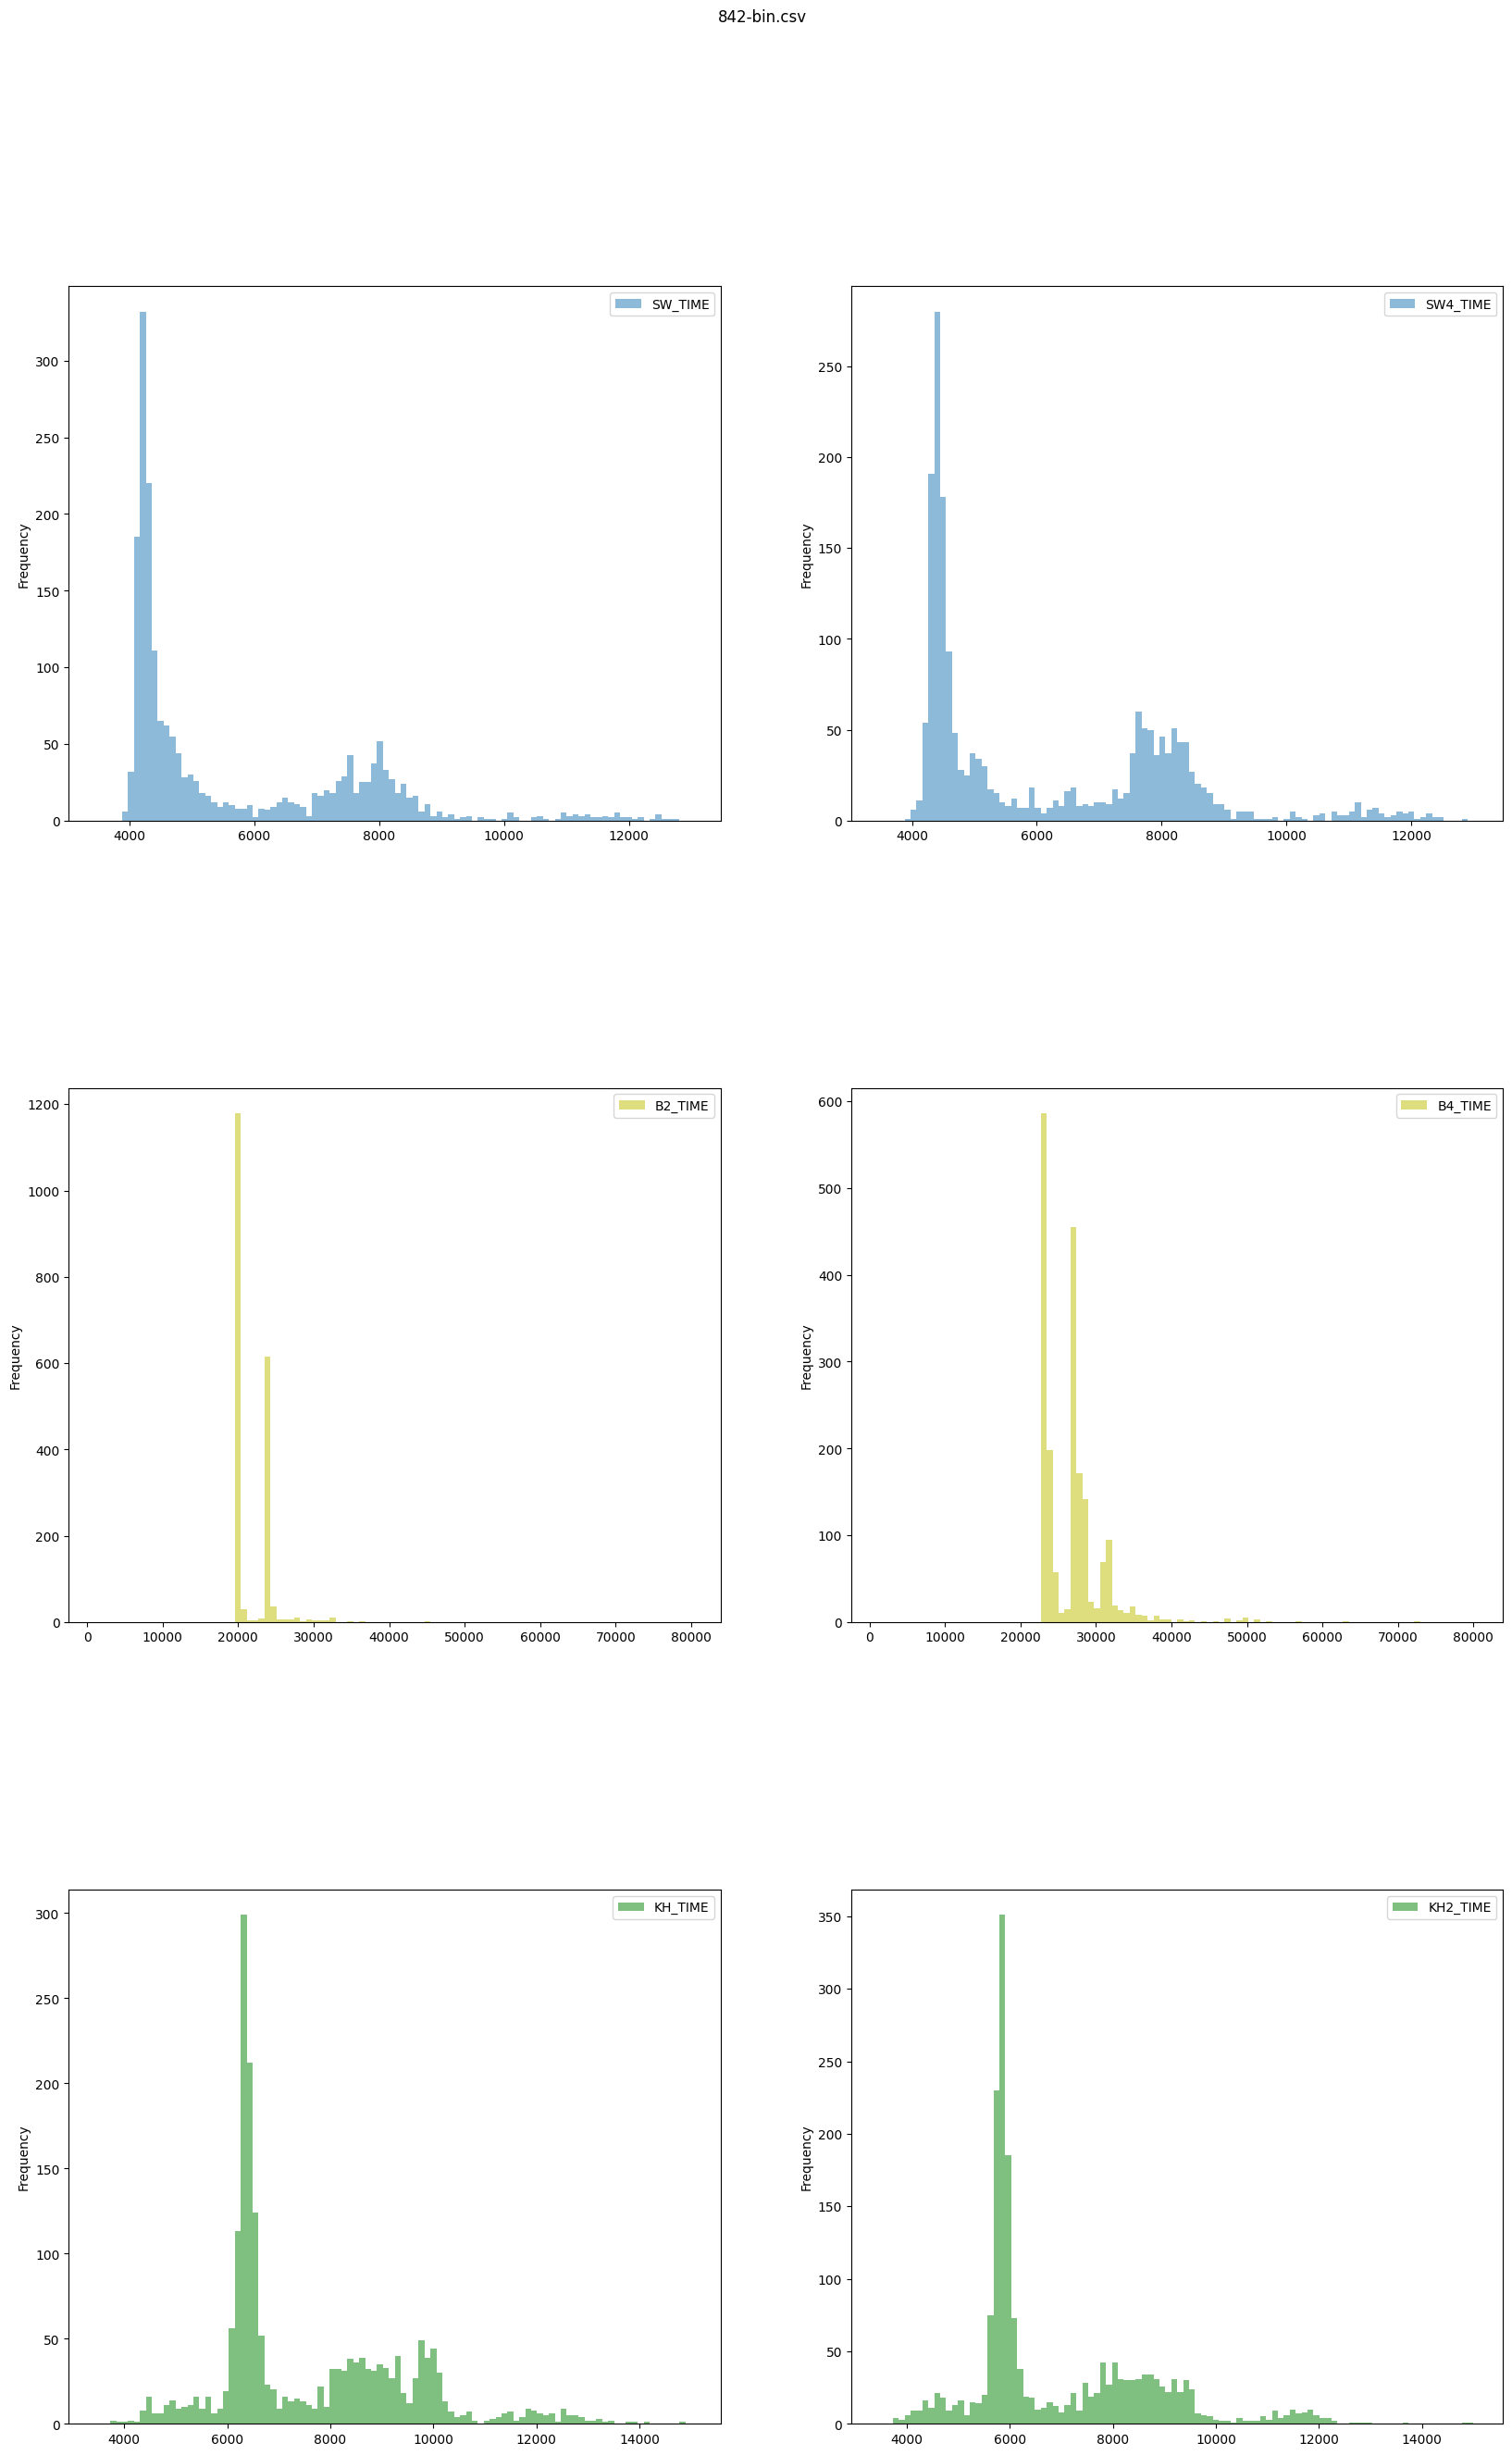

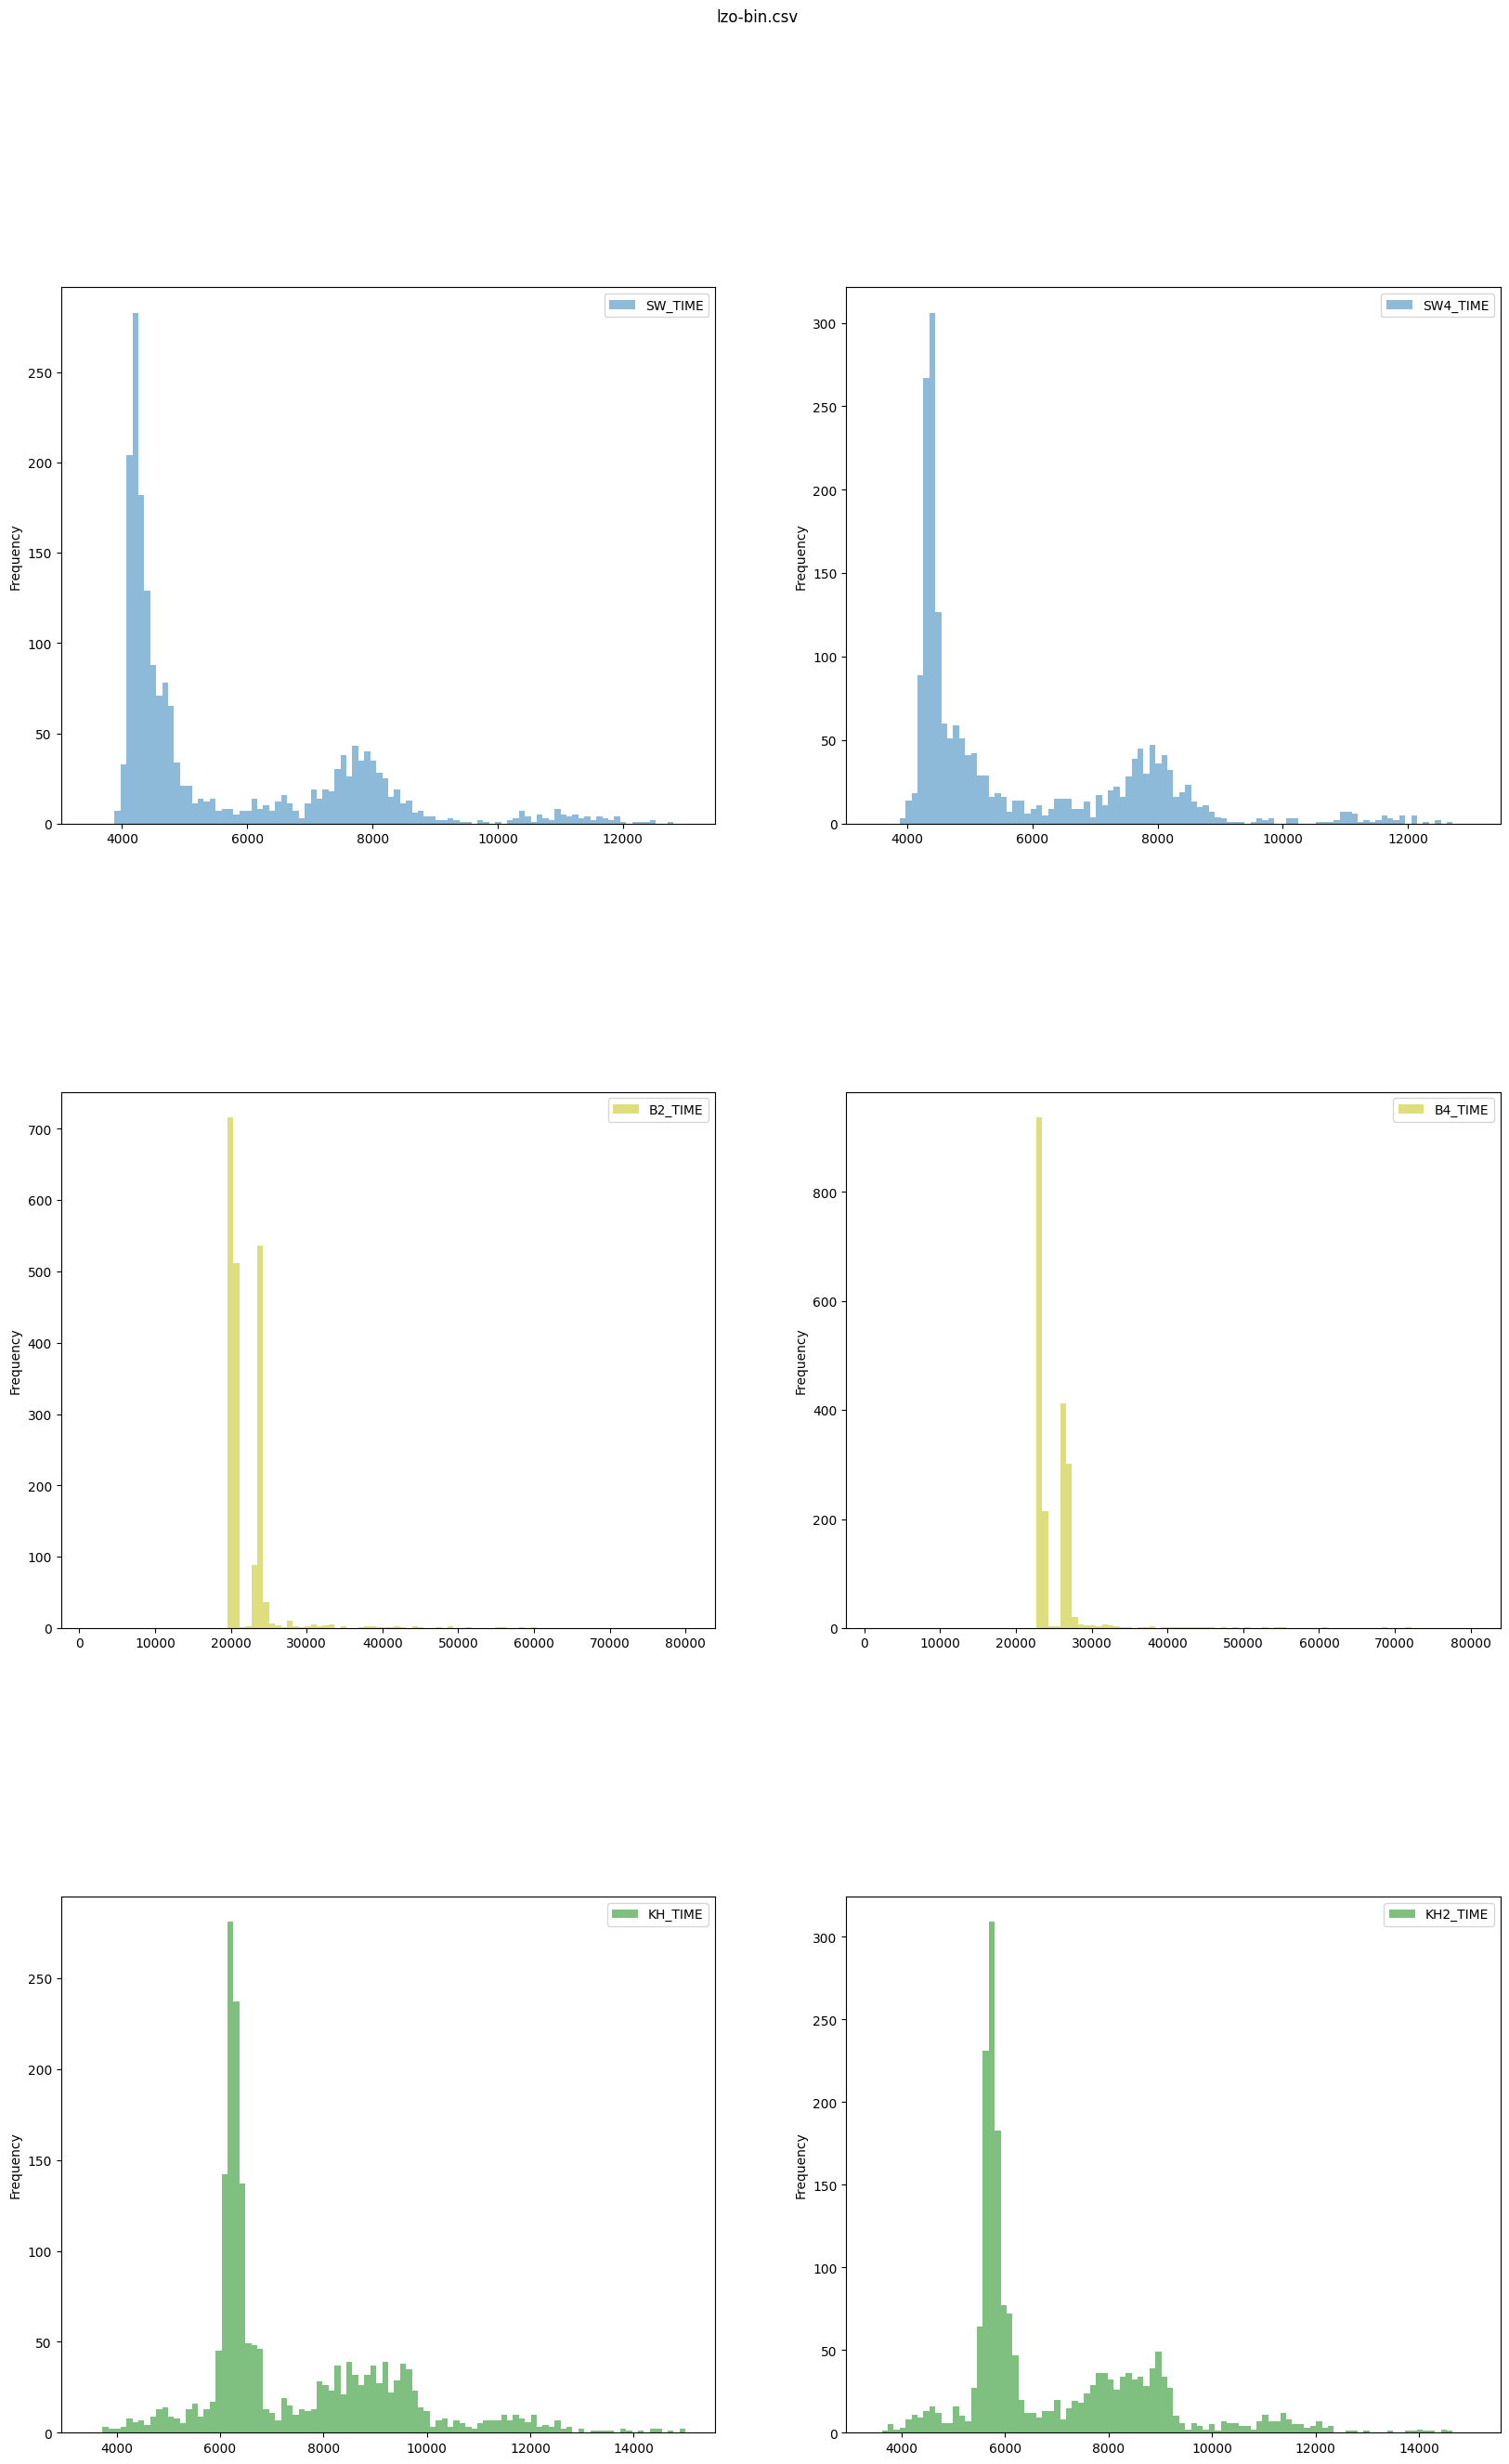

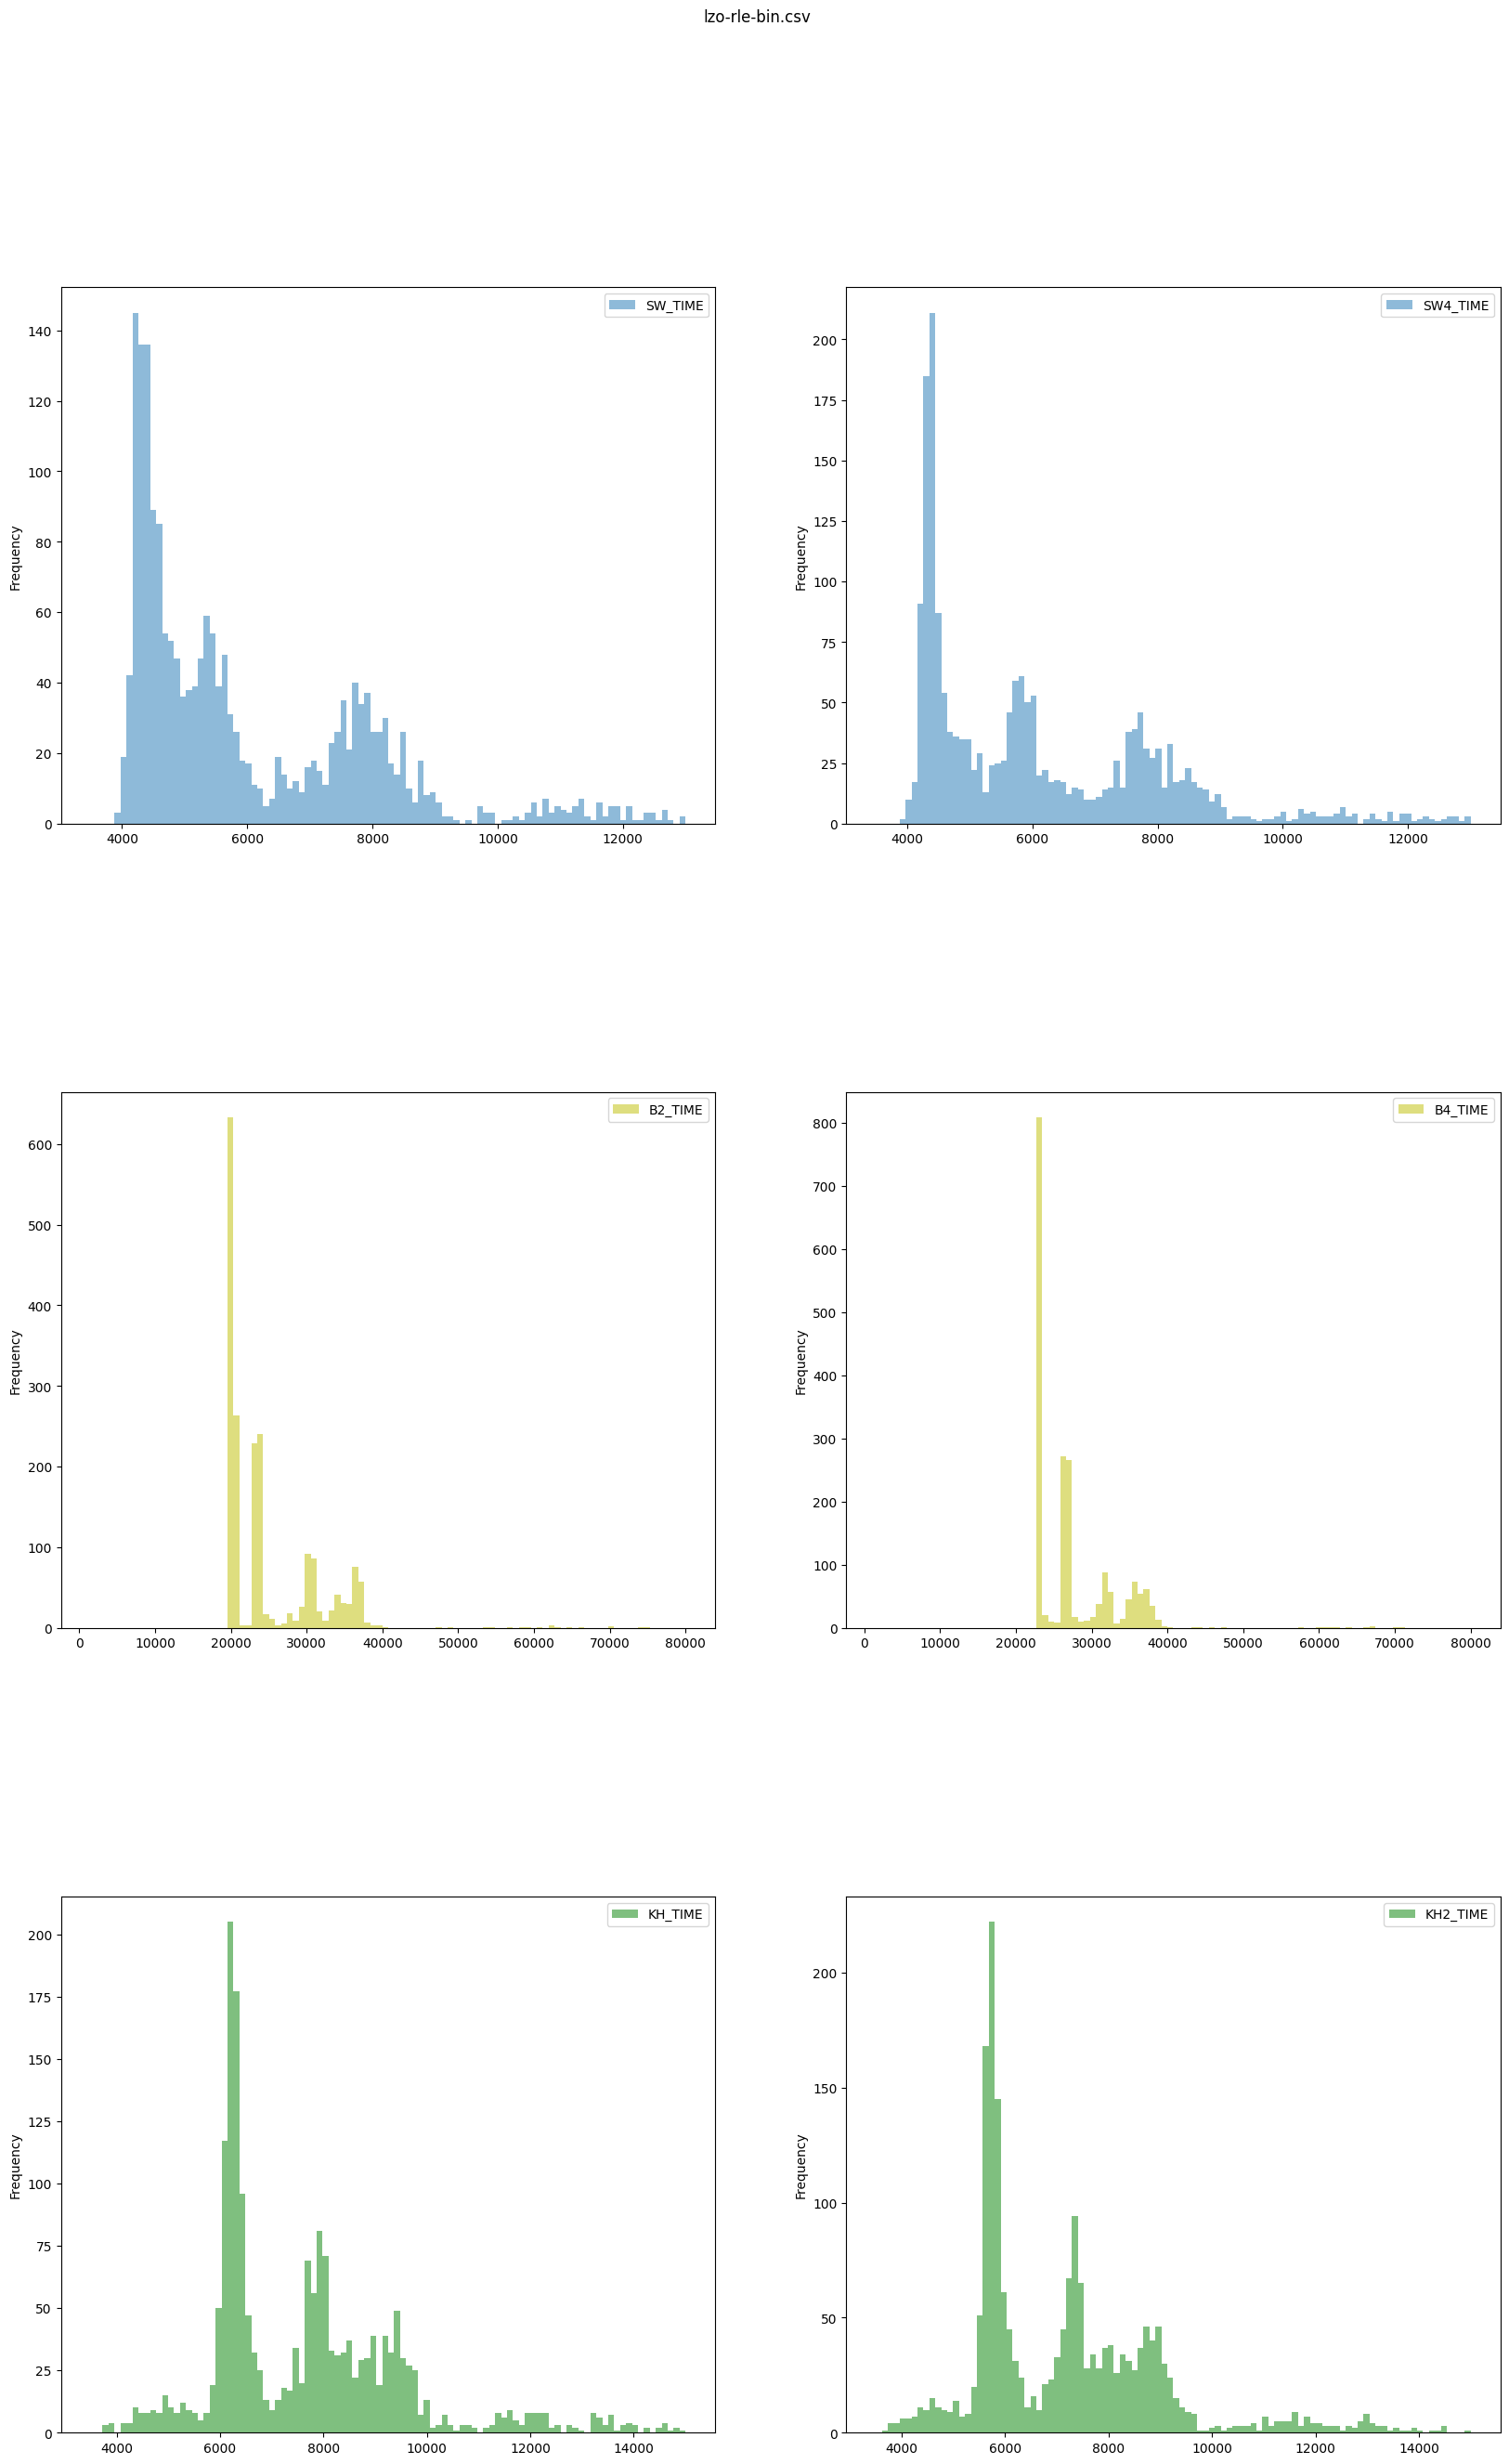

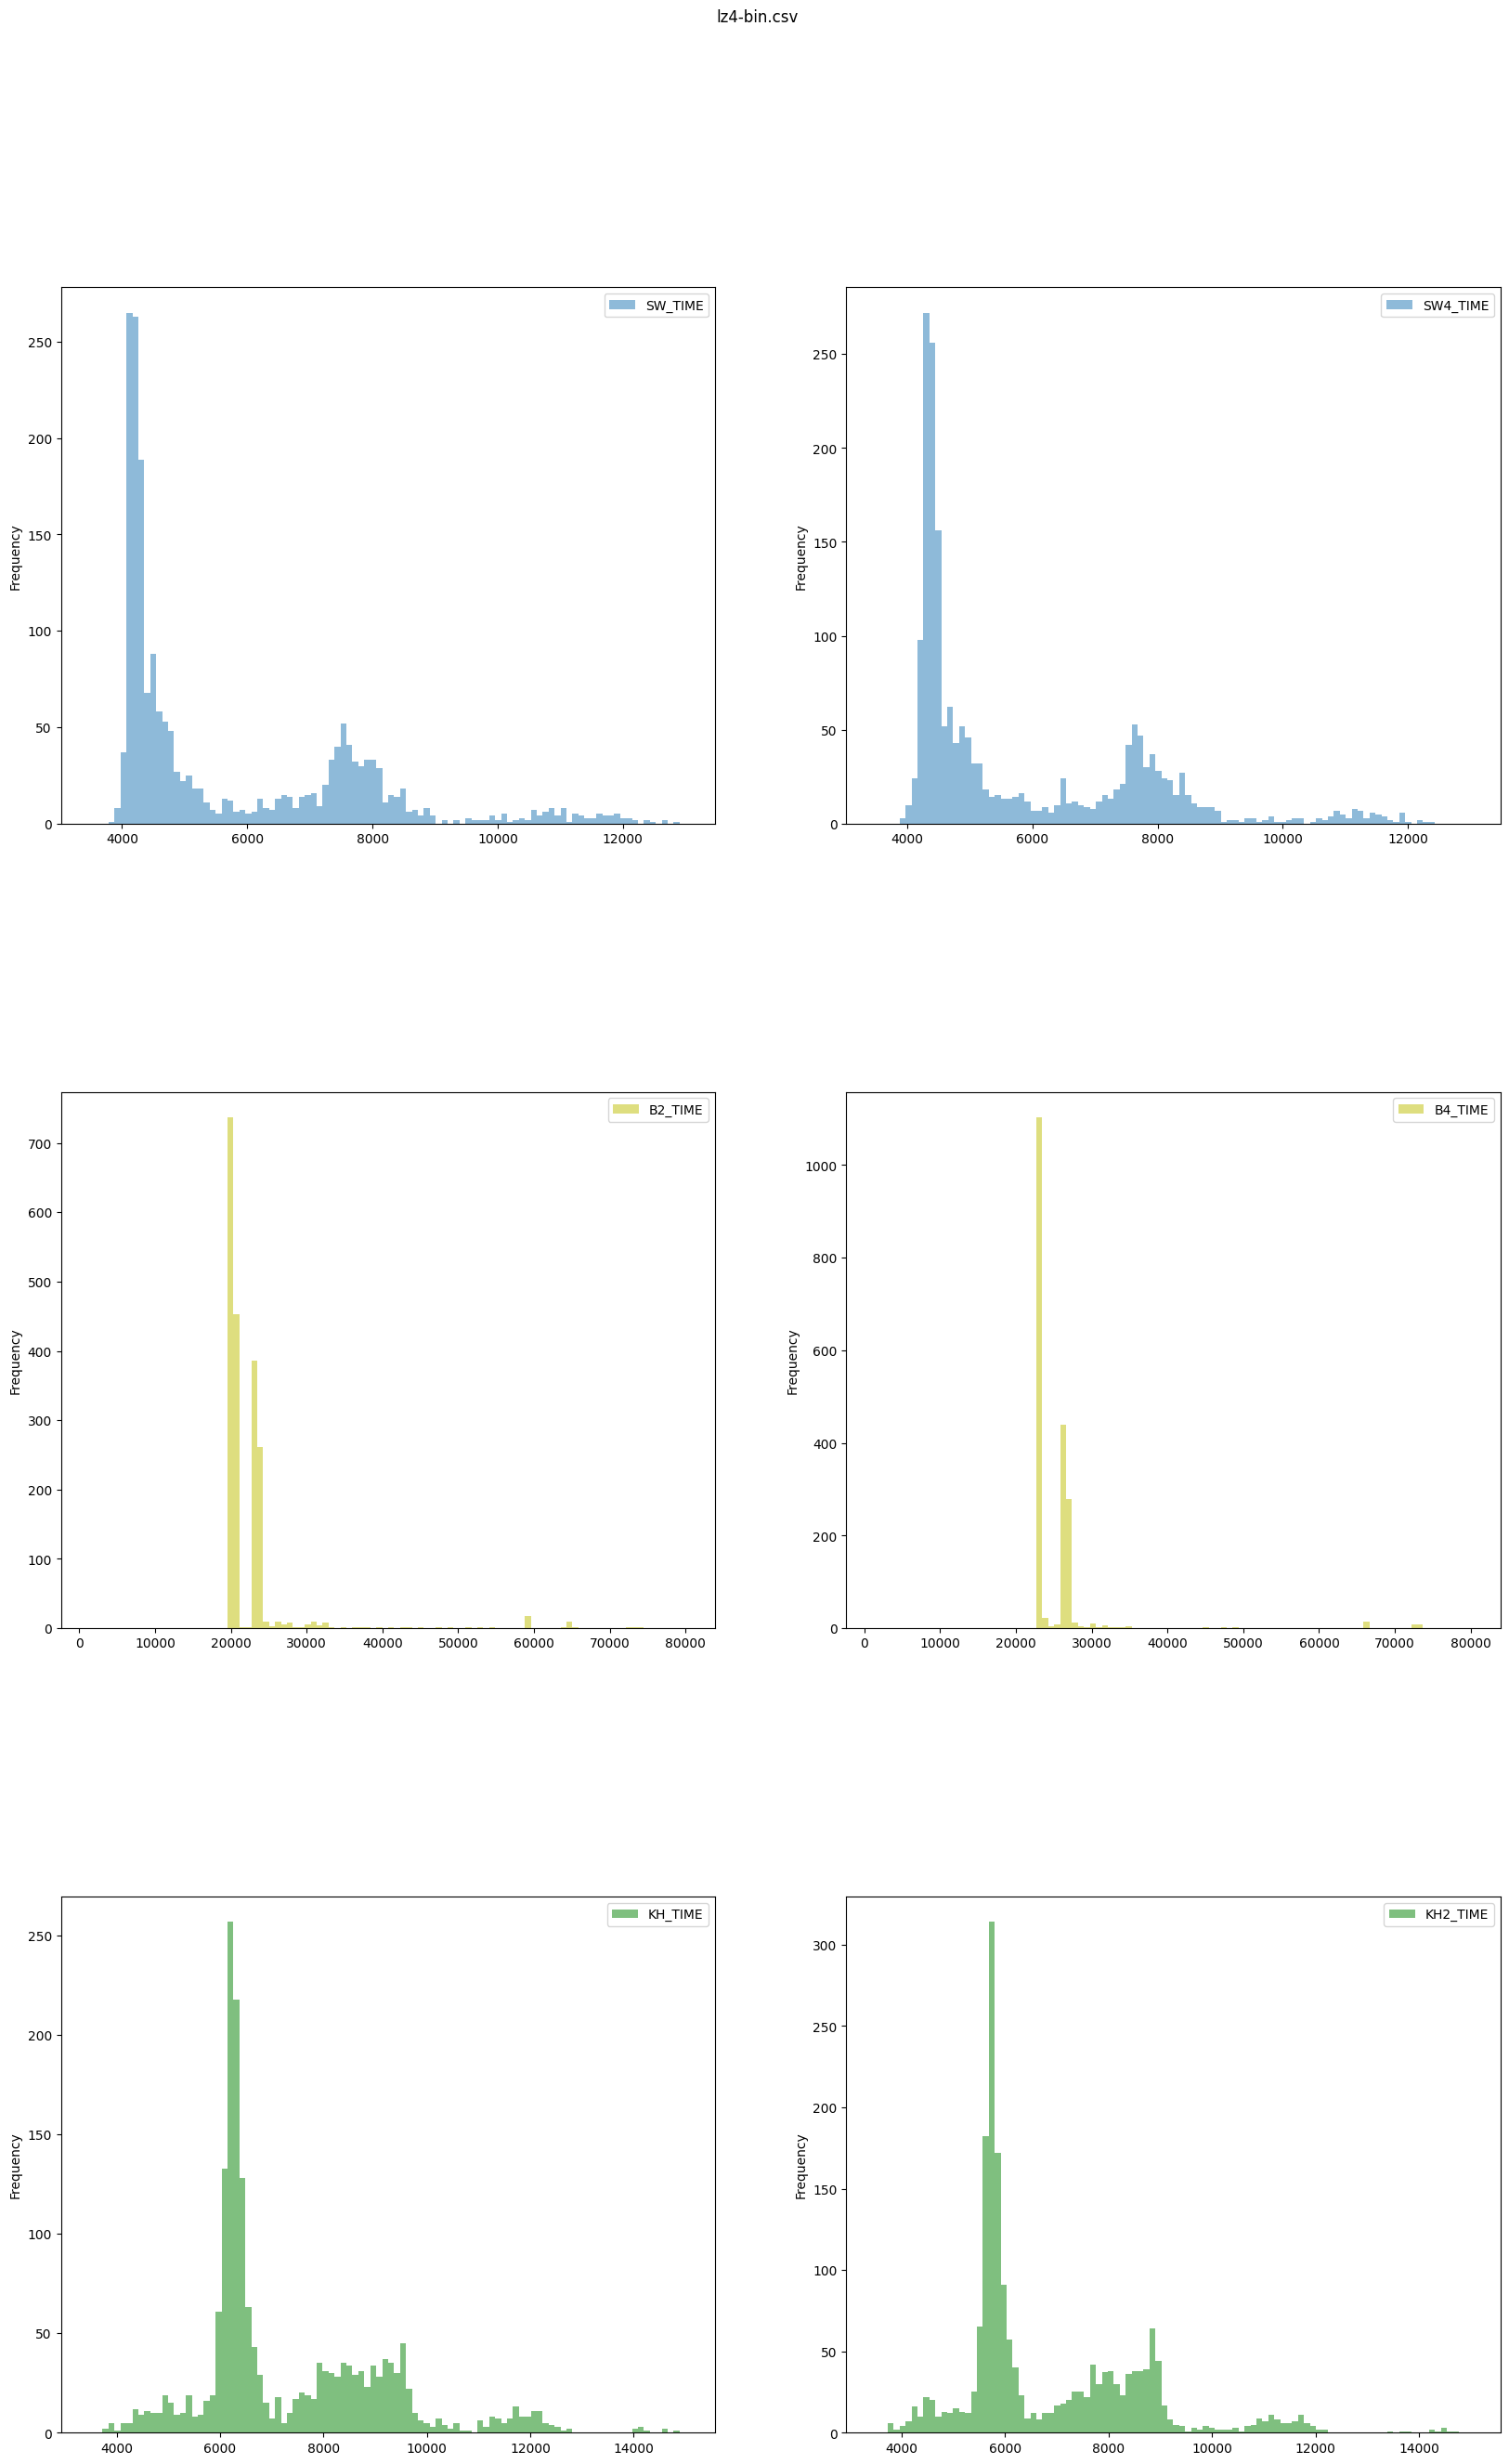

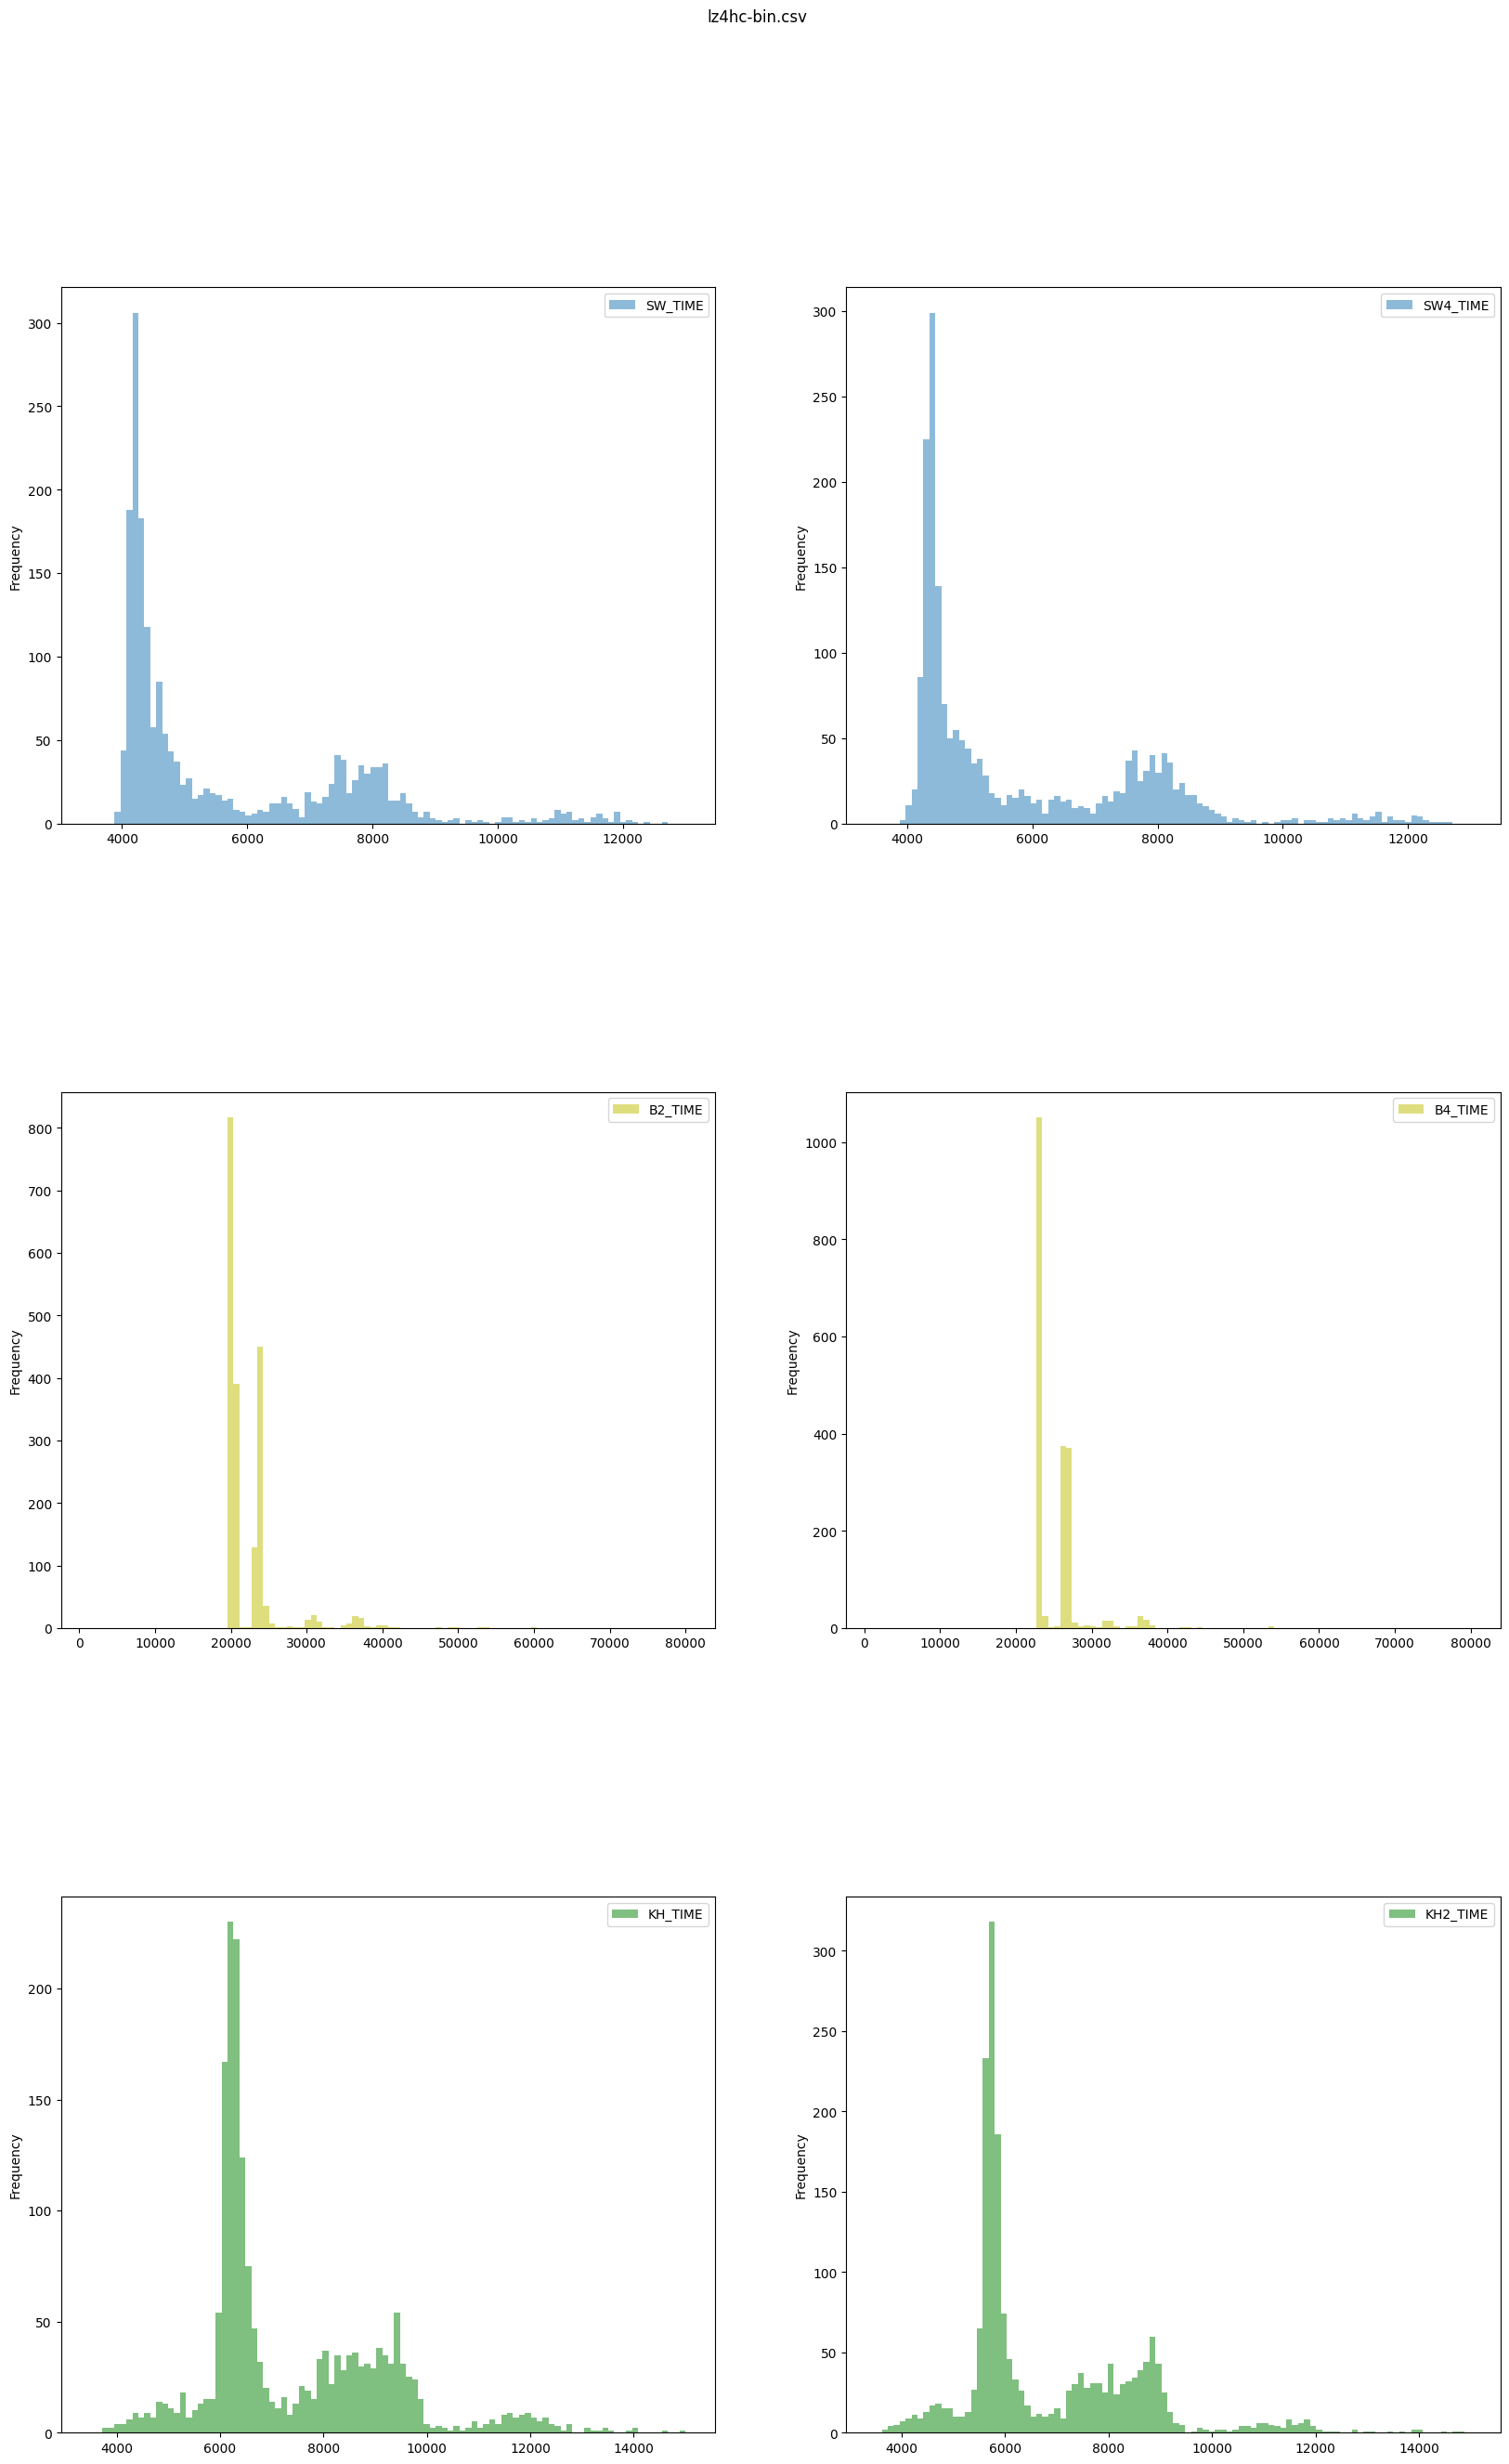

In [31]:
import pandas as pd


DATA_PATH = 'https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/'

def visualize_statistics(file):
  df = pd.read_csv(DATA_PATH + file)

  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 30))


  df[['SW_TIME']].plot.hist(bins=100, alpha=0.5, range=[3500,13000], ax=axes[0][0])
  df[['SW4_TIME']].plot.hist(bins=100, alpha=0.5, range=[3500,13000], ax=axes[0][1])
  df[['B2_TIME']].plot.hist(bins=100, alpha=0.5, range=[1500,80000], ax=axes[1][0], color='y')
  df[['B4_TIME']].plot.hist(bins=100, alpha=0.5, range=[1500,80000], ax=axes[1][1], color='y')
  df[['KH_TIME']].plot.hist(bins=100, alpha=0.5, range=[3500,15000], ax=axes[2][0], color='g')
  df[['KH2_TIME']].plot.hist(bins=100, alpha=0.5, range=[3500,15000], ax=axes[2][1], color='g')

  plt.subplots_adjust(hspace=0.5)
  fig.suptitle(file)
  plt.show()

visualize_statistics('zstd-bin.csv')
visualize_statistics('842-bin.csv')
visualize_statistics('lzo-bin.csv')
visualize_statistics('lzo-rle-bin.csv')
visualize_statistics('lz4-bin.csv')
visualize_statistics('lz4hc-bin.csv')


5.570119326386896 38.23175520736237 56.19812546625074


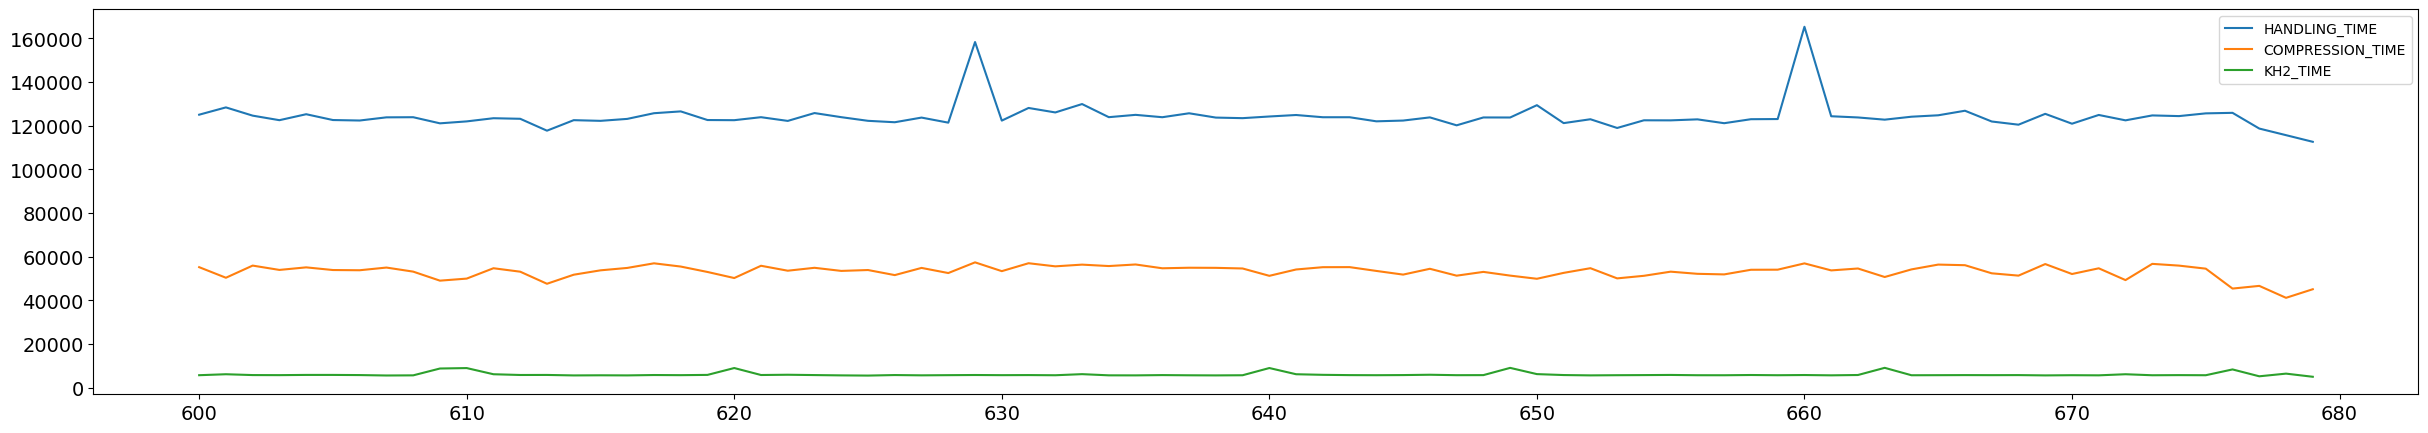

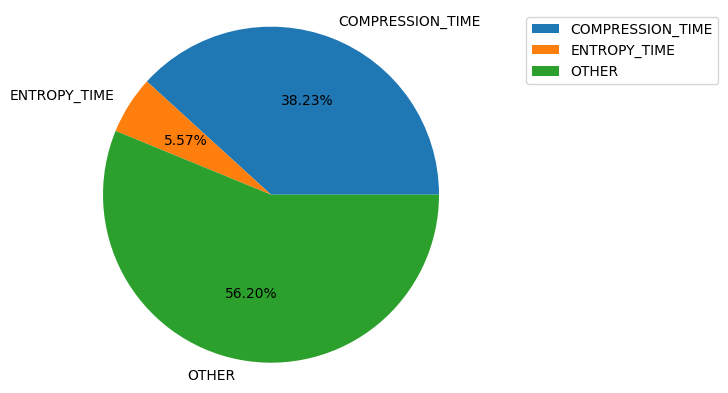

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = 'https://raw.githubusercontent.com/hamzreg/bmstu-diploma/main/src/scripts/stat/vm2/'

FILE = 'zstd-bin.csv'

df = pd.read_csv(DATA_PATH + FILE)

df['ENTROPY_PERCENT'] = df['KH2_TIME'] * 100 / df['HANDLING_TIME']
df['COMPRESSION_PERCENT'] = df['COMPRESSION_TIME'] * 100 / df['HANDLING_TIME']
mean_entropy = df['ENTROPY_PERCENT'].mean()
mean_compression = df['COMPRESSION_PERCENT'].mean()
other = 100 - (mean_entropy + mean_compression)
print(mean_entropy, mean_compression, other)

df = df[600:680]
df[['HANDLING_TIME','COMPRESSION_TIME', 'KH2_TIME']].plot.line(figsize=(30, 5), fontsize=14)

fig, ax = plt.subplots()
ax.pie([mean_compression, mean_entropy, other], labels=['COMPRESSION_TIME', 'ENTROPY_TIME', 'OTHER'], autopct='%1.2f%%')
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()